In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from numerize import numerize


from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay


import zipfile
from zipfile import ZipFile


import warnings
warnings.filterwarnings('ignore')

In [2]:
#unzip file
filepath=os.getcwd()
with zipfile.ZipFile('archive.zip','r') as zip_ref:
    zip_ref.extractall(filepath)

In [3]:
#specifying filepath for csv
path = os.getcwd()

#csv file in the path
file = glob.glob(path + "/*.csv")

#define empty list for storing data
#content
data_frame=pd.DataFrame()
content=[]


#checking all csv file in specific file path
for filename in file:

    #read content of csv file
    df = pd.read_csv(filename,index_col=None)
    content.append(df)

#converting content to data_frame
data_frame=pd.concat(content)

#Head of Dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
#Remove all unwanted white space from dataset
df = df.replace(r'\s+', ' ', regex=True)

In [5]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(df.isnull().sum() * 100 / len(df),2))

Checking Data has null values or not
Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64


In [6]:
#check info (dtype)
print("==="*25)
print("Data Information")
print("==="*25)
print(df.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11

In [7]:
#Describe (numrical)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
#Describe(object)
df.describe(include=object).T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


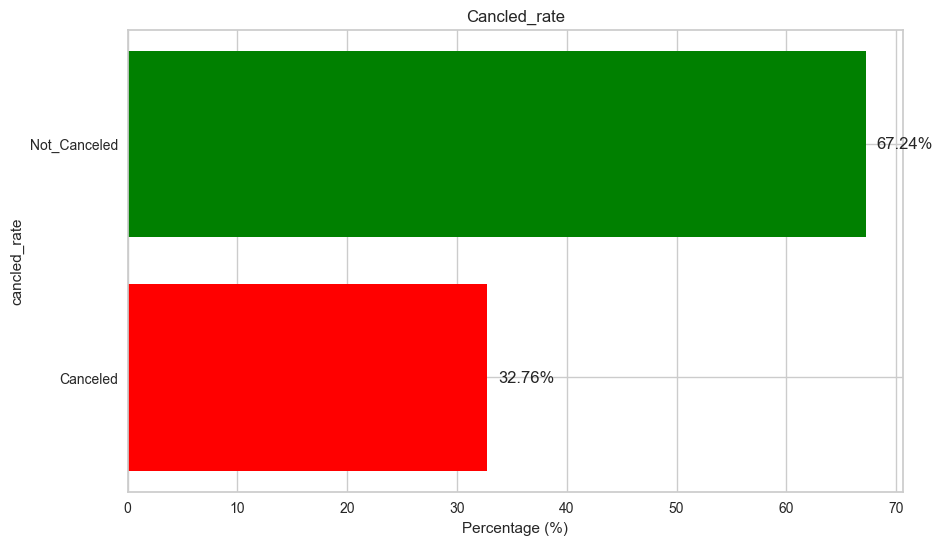

In [9]:
#Calculate Booking_Status Rate
cancled_rate = df['booking_status'].value_counts(normalize=True) * 100

#With normalize set to True , returns the relative frequency by dividing all values by the sum of values. \
# Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values,\
# divide the index in the specified number of half-open bins.

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cancled_rate.index, cancled_rate.values, color=['green','red'])

plt.xlabel('Percentage (%)')
plt.ylabel('cancled_rate')
plt.title('Cancled_rate')
plt.gca().invert_yaxis()  # Invert y-axis

# Add percentage labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.show()

In [10]:
#Separating numerical and categorical columns
num=[]
cat=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        cat.append(col)

print('Numerical columns : ',num)
print('Categorical columns : ',cat)

Numerical columns :  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical columns :  ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


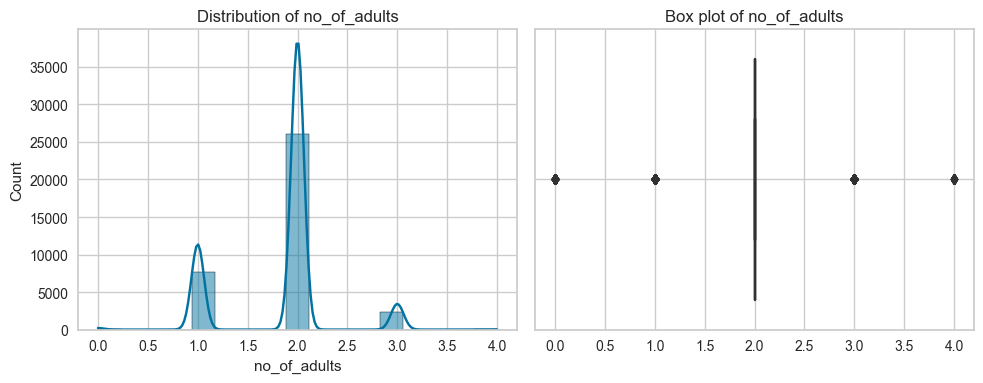

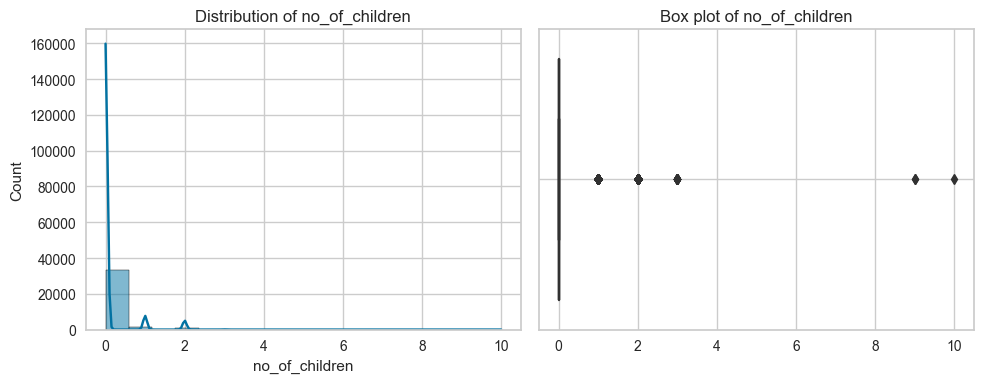

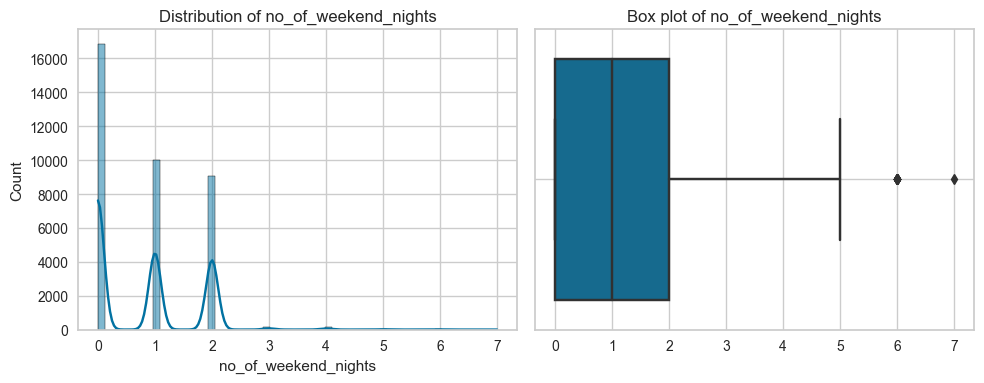

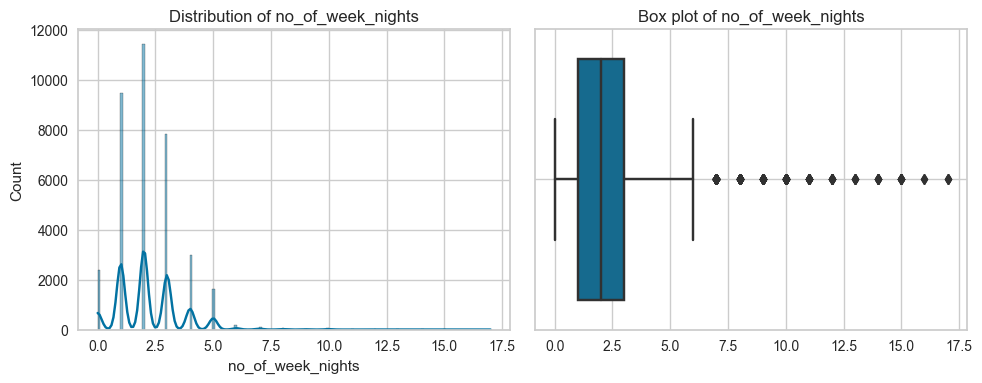

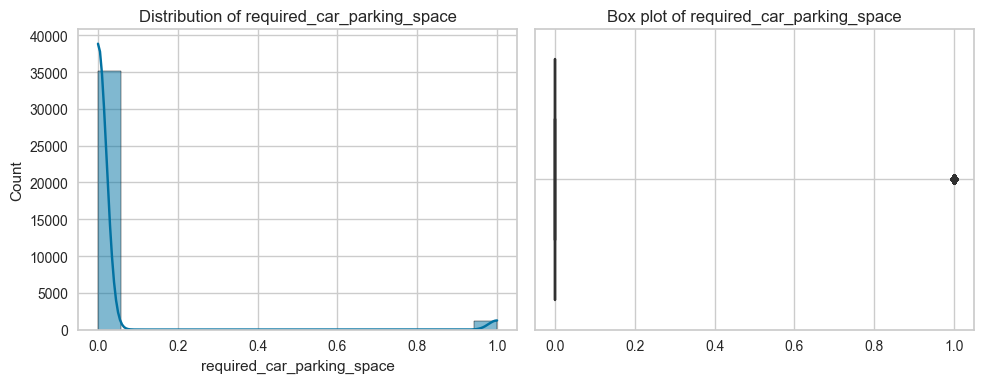

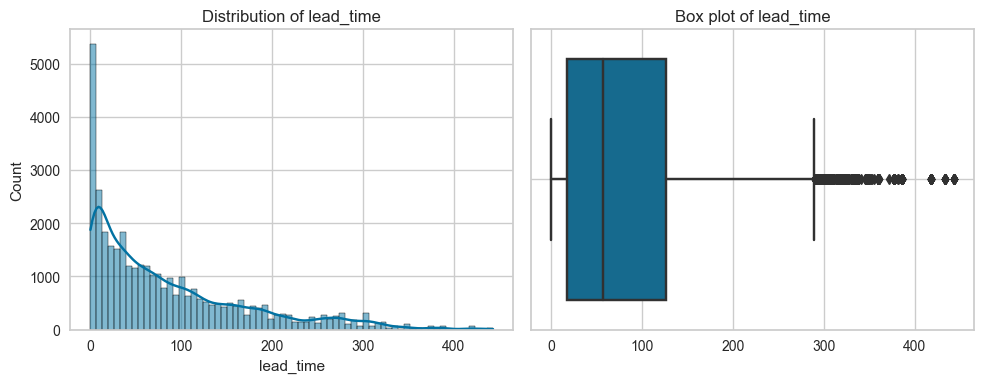

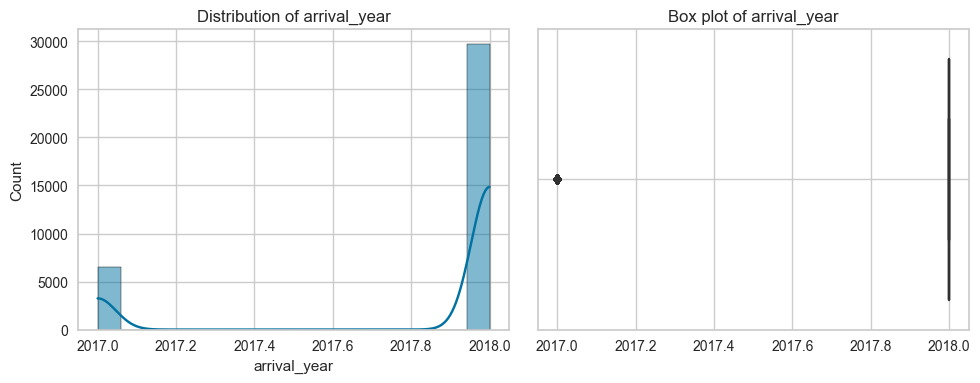

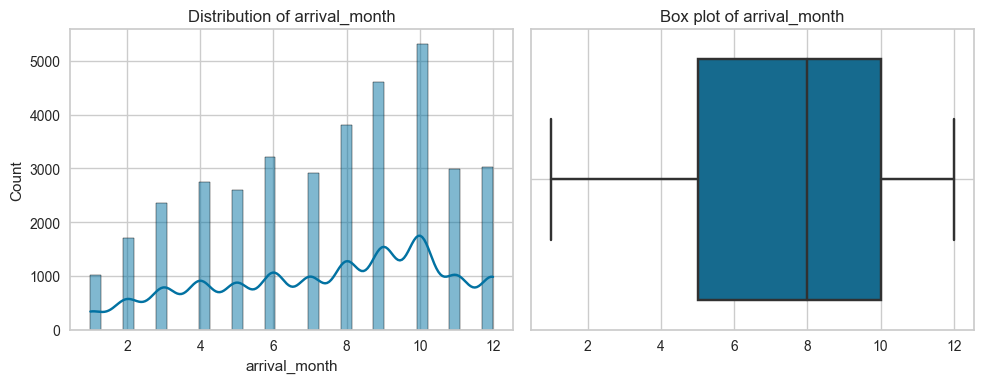

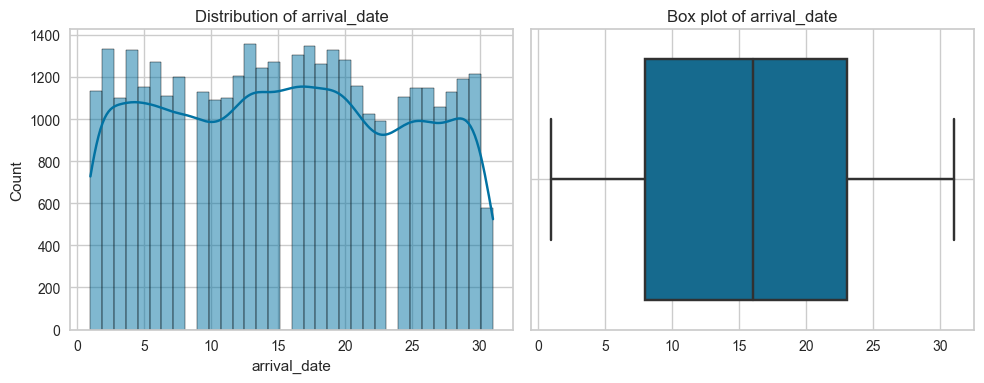

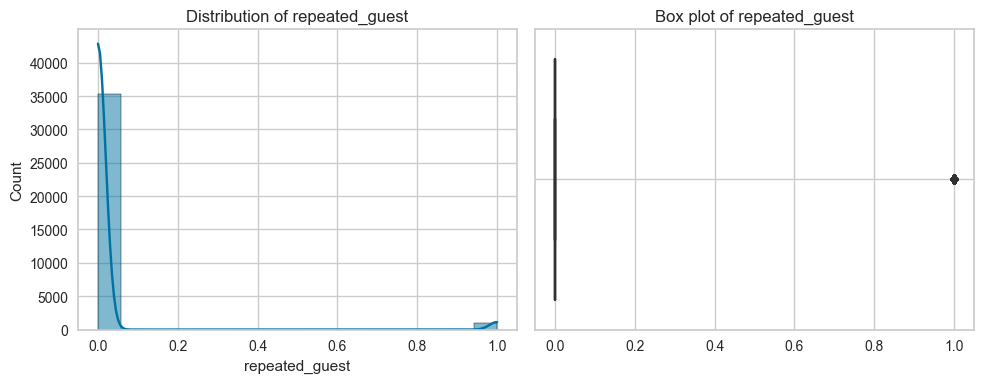

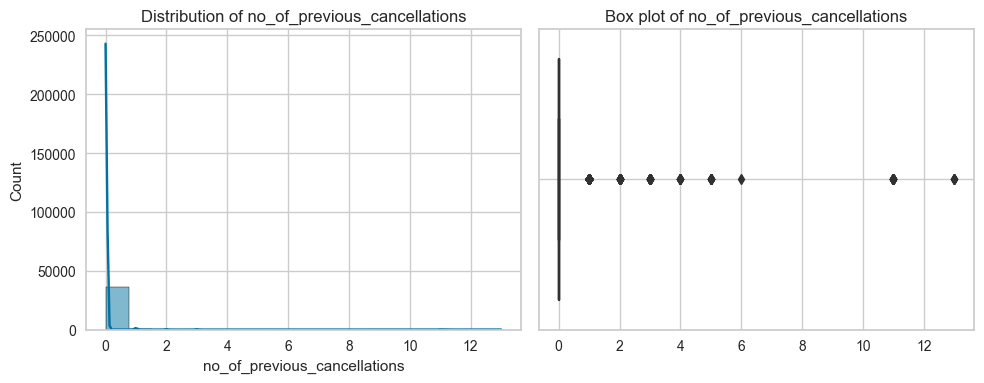

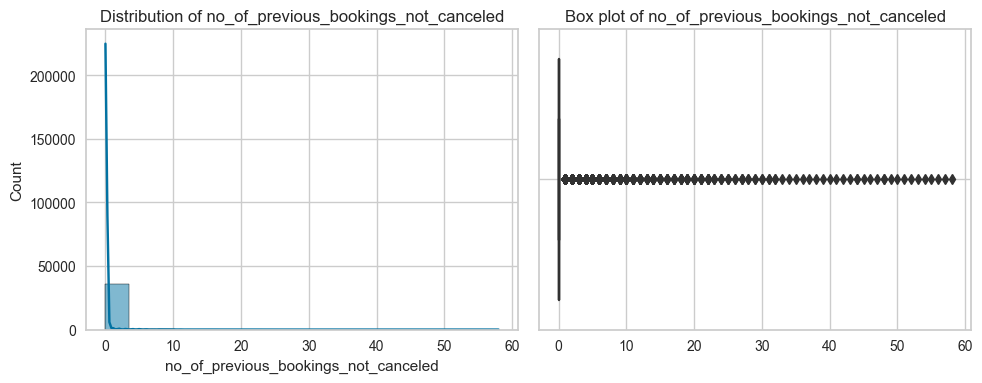

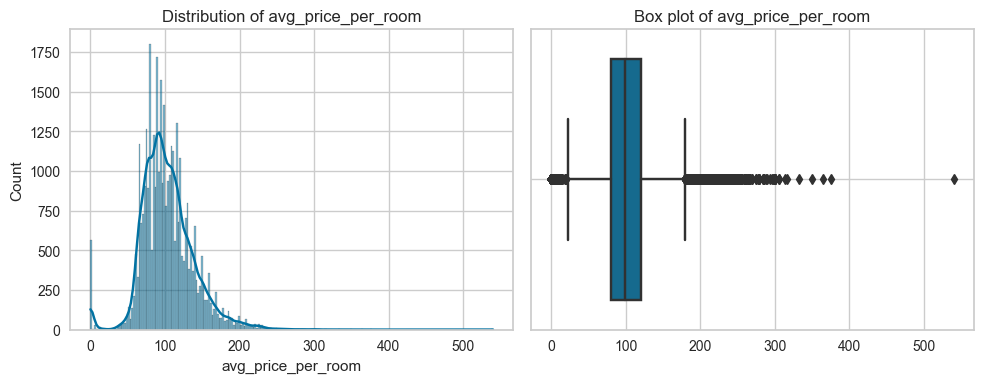

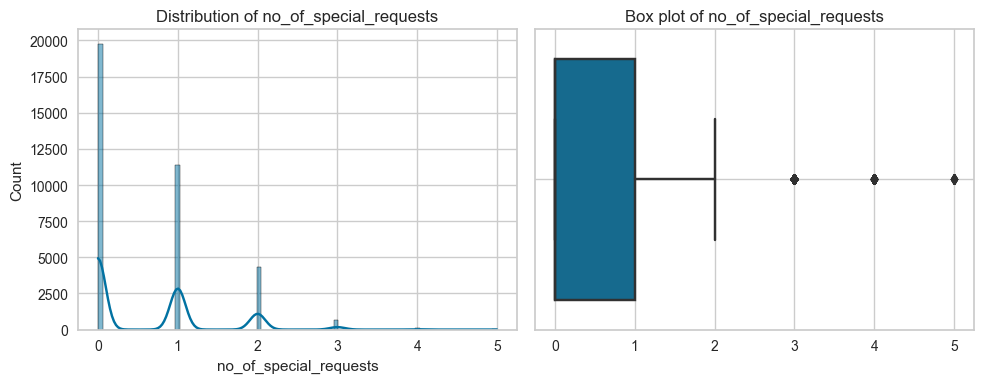

In [11]:
#Numerical column analysis

for i in num:
    fig,axes=plt.subplots(1,2,figsize=(10,4))

    sns.histplot(df[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

In [12]:
variables=df.columns[df.dtypes=='object'].drop(['Booking_ID','booking_status'])

results=[]
for variable in variables:
    contingency_table=pd.crosstab(df[variable],df['booking_status'])
    chi2,p_value,_,_ =chi2_contingency(contingency_table)
    results.append({'variable':variable,'chi square':chi2,'p-value':p_value})

results_df=pd.DataFrame(results)
results_df

,variable,chi square,p-value
0,type_of_meal_plan,278.294909,4.951915e-60
1,room_type_reserved,57.334952,1.562780e-10
2,market_segment_type,814.108865,6.748763e-175


In [13]:
variables=df.columns[df.dtypes=='object'].drop(['Booking_ID','booking_status'])

results=[]
for variable in variables:
    contingency_table=pd.crosstab(df[variable],df['booking_status'])
    chi2,p_value,_,_ =chi2_contingency(contingency_table)
    results.append({'variable':variable,'chi square':chi2,'p-value':p_value})

results_df=pd.DataFrame(results)
results_df

,variable,chi square,p-value
0,type_of_meal_plan,278.294909,4.951915e-60
1,room_type_reserved,57.334952,1.562780e-10
2,market_segment_type,814.108865,6.748763e-175


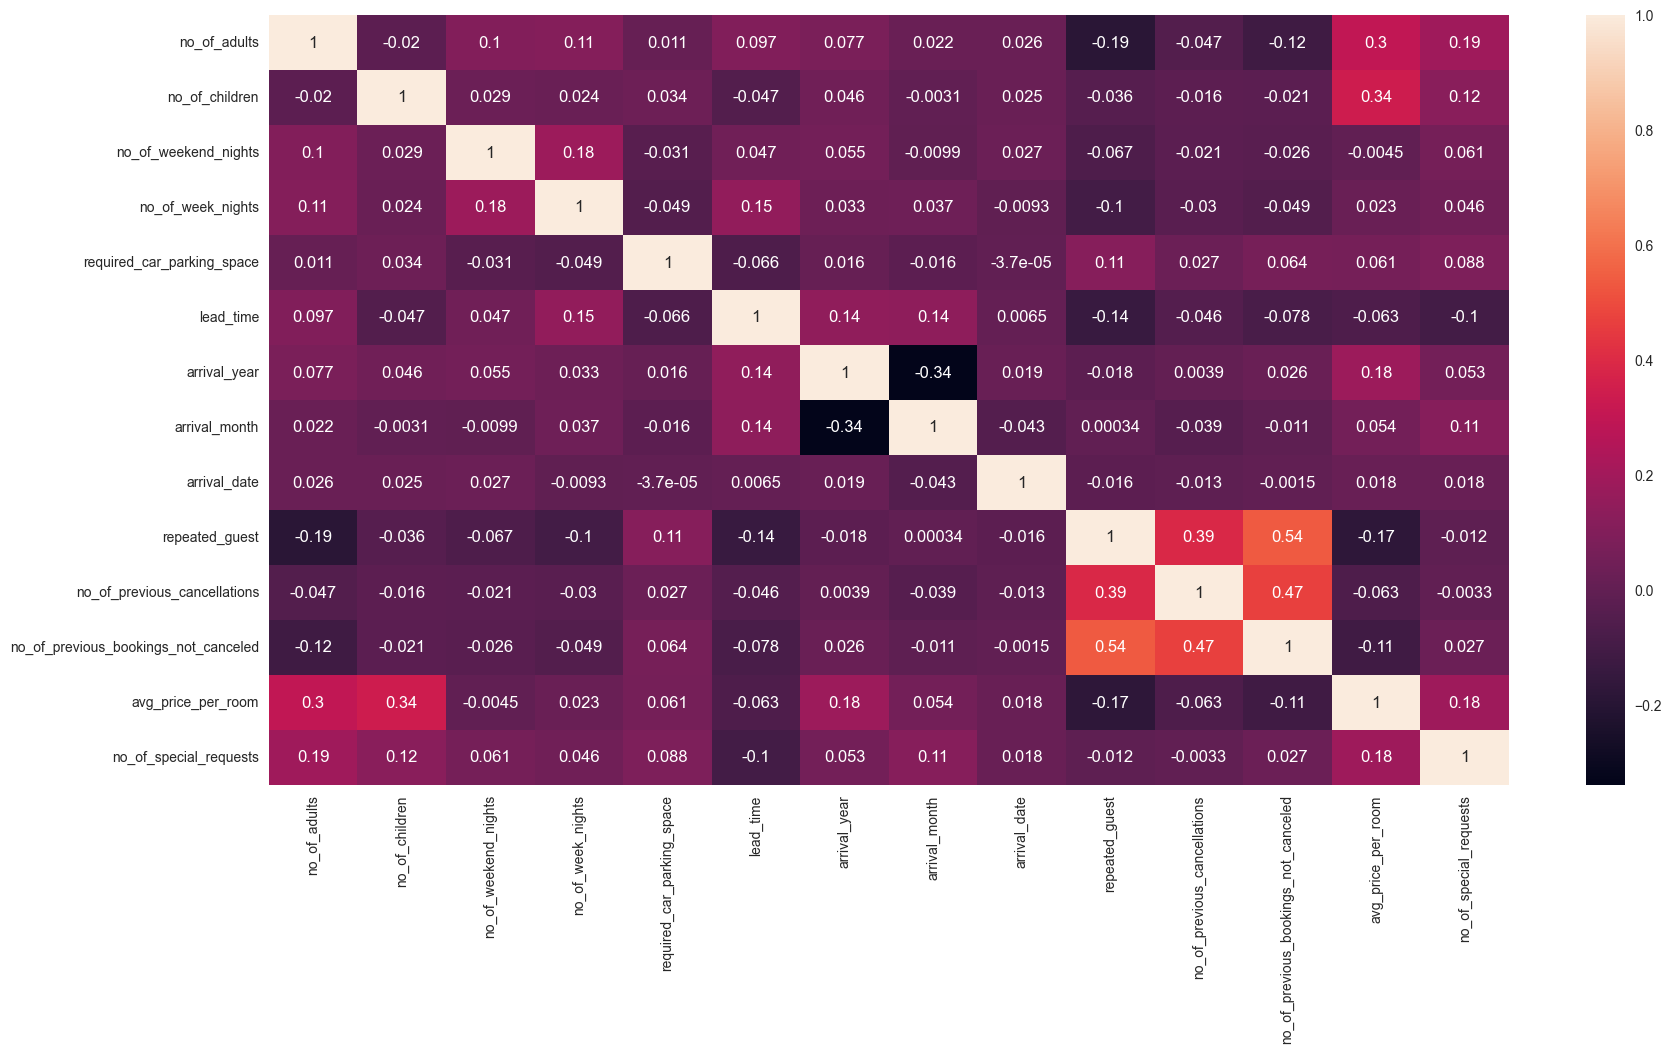

In [14]:
#plot heatmap
plt.figure(figsize=(20,10))
correlation=df.corr(numeric_only=True)
ax = sns.heatmap(correlation,annot=True)
plt.show()

<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

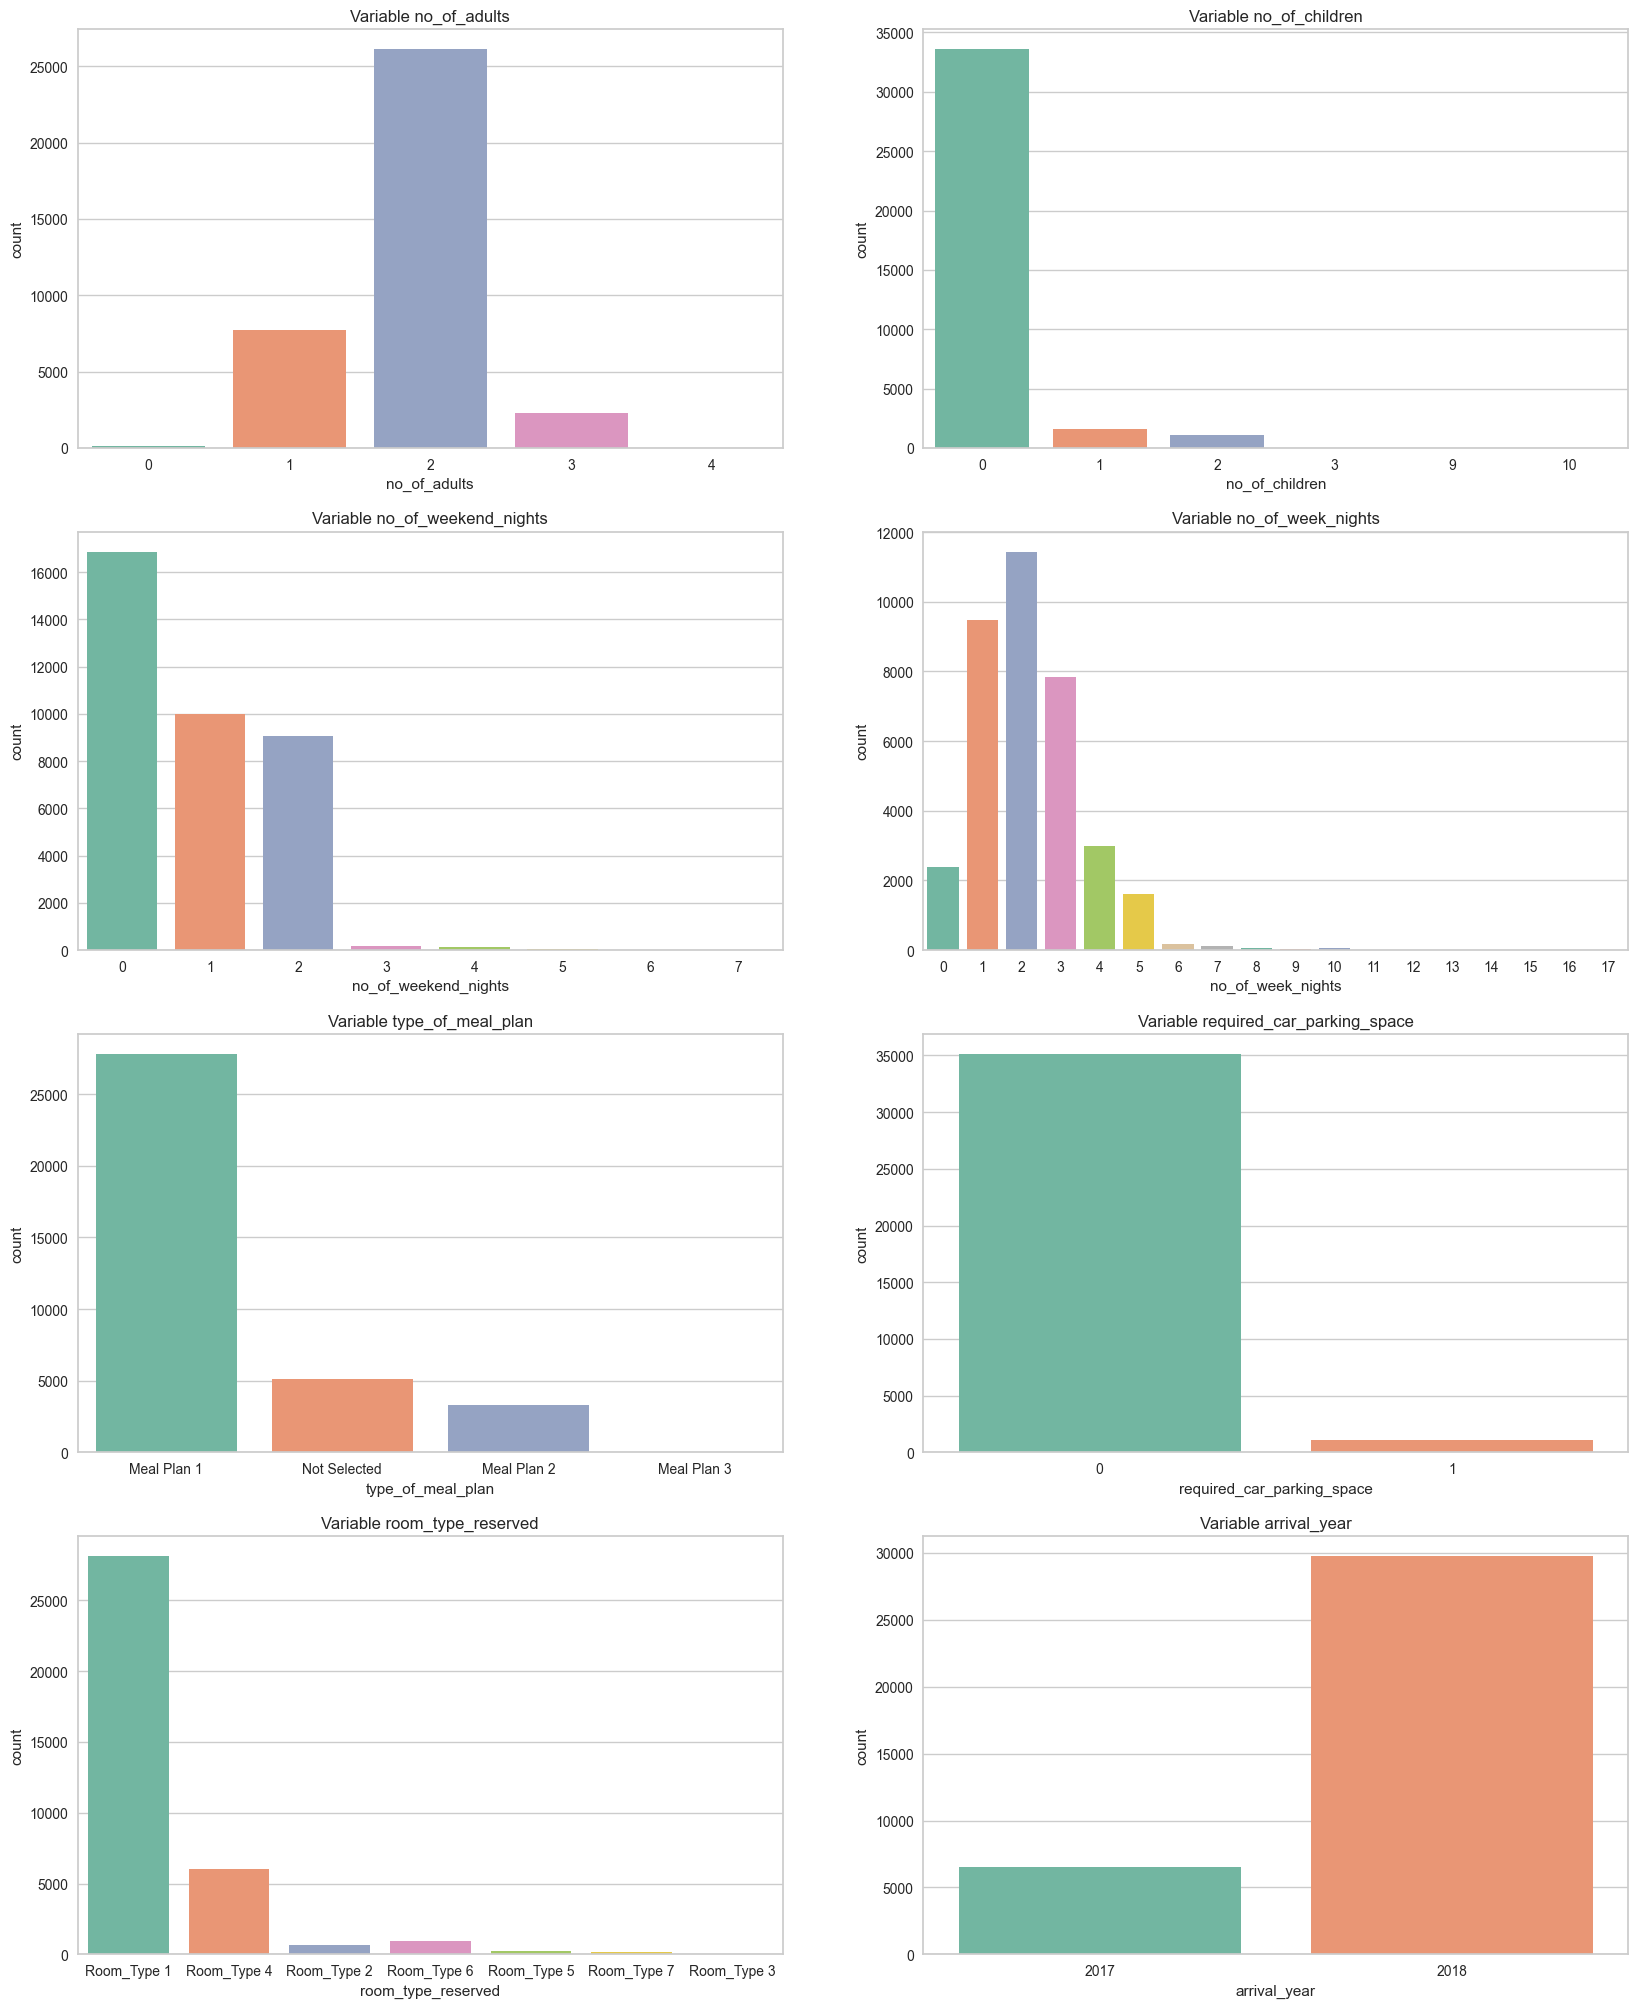

In [15]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

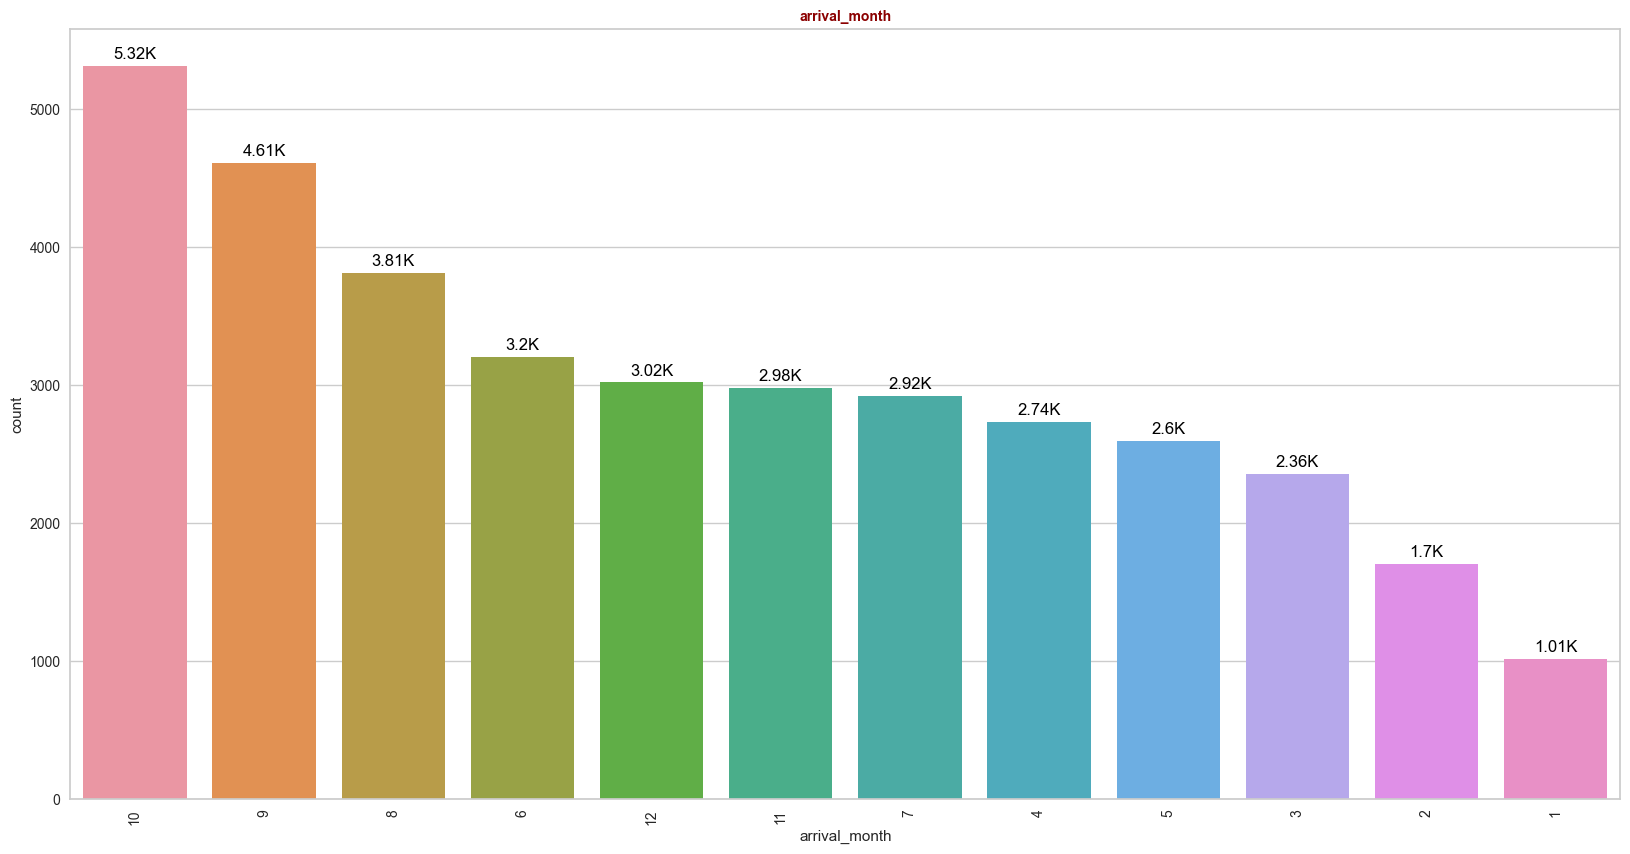

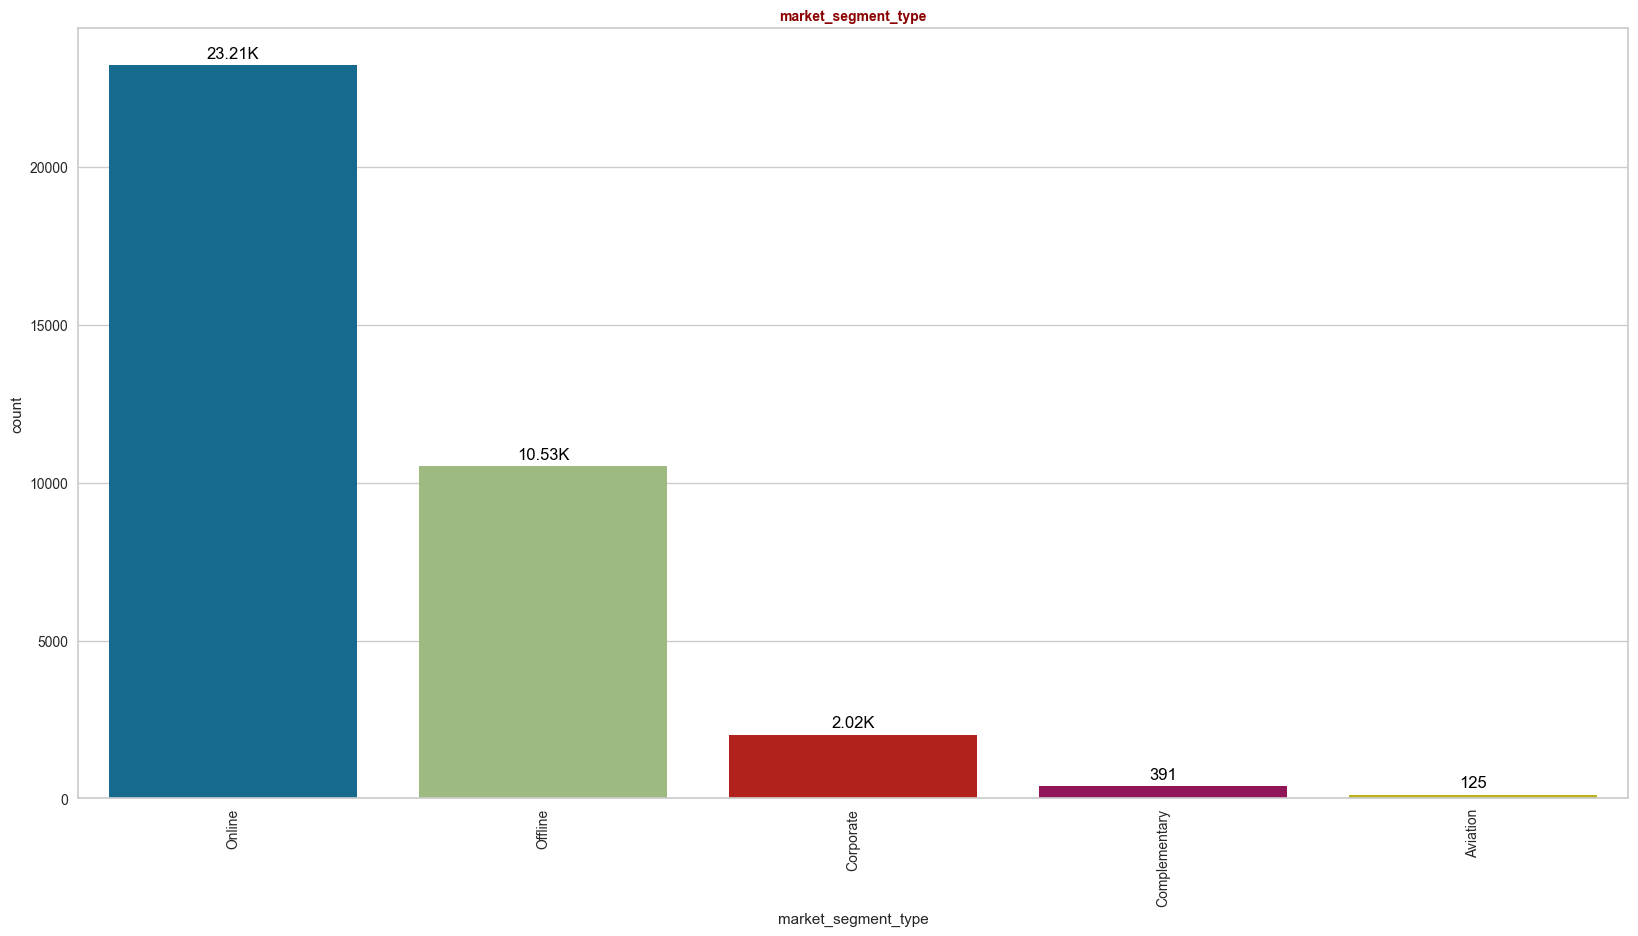

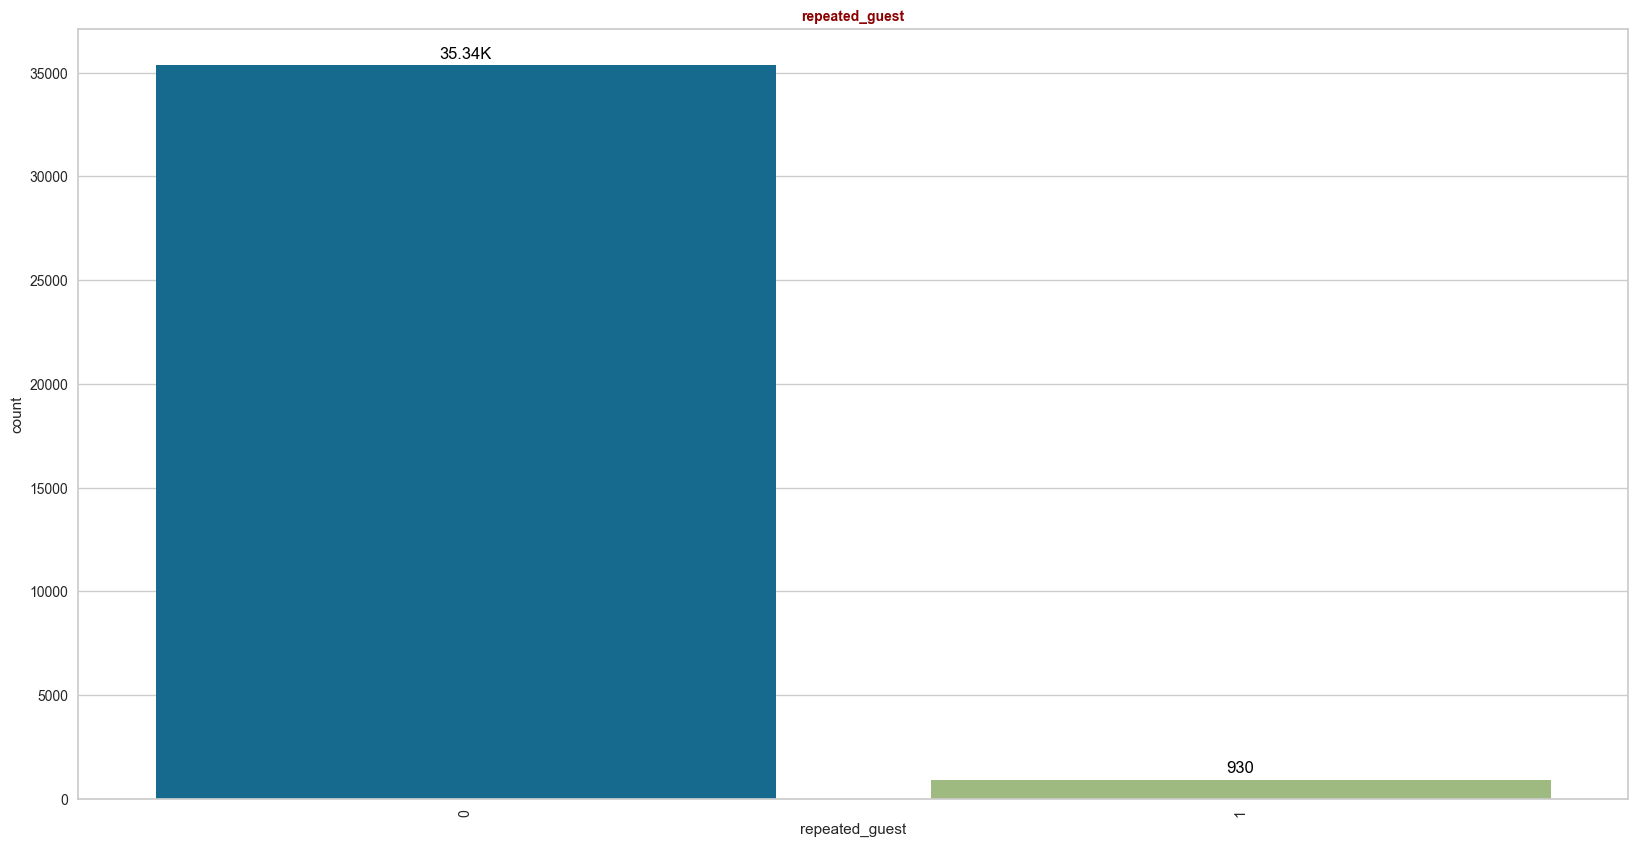

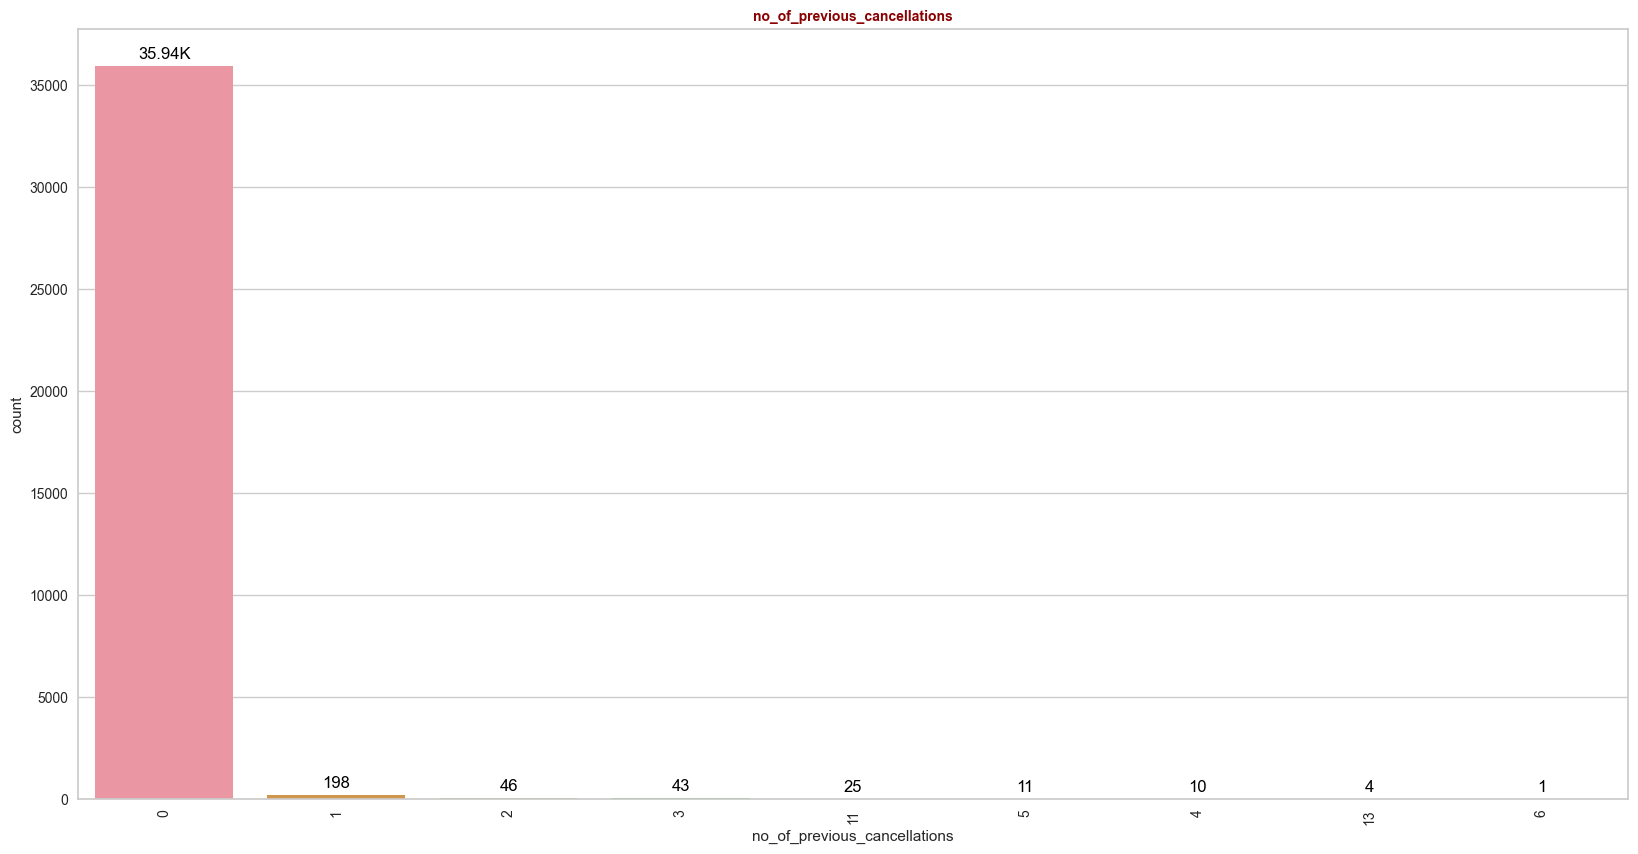

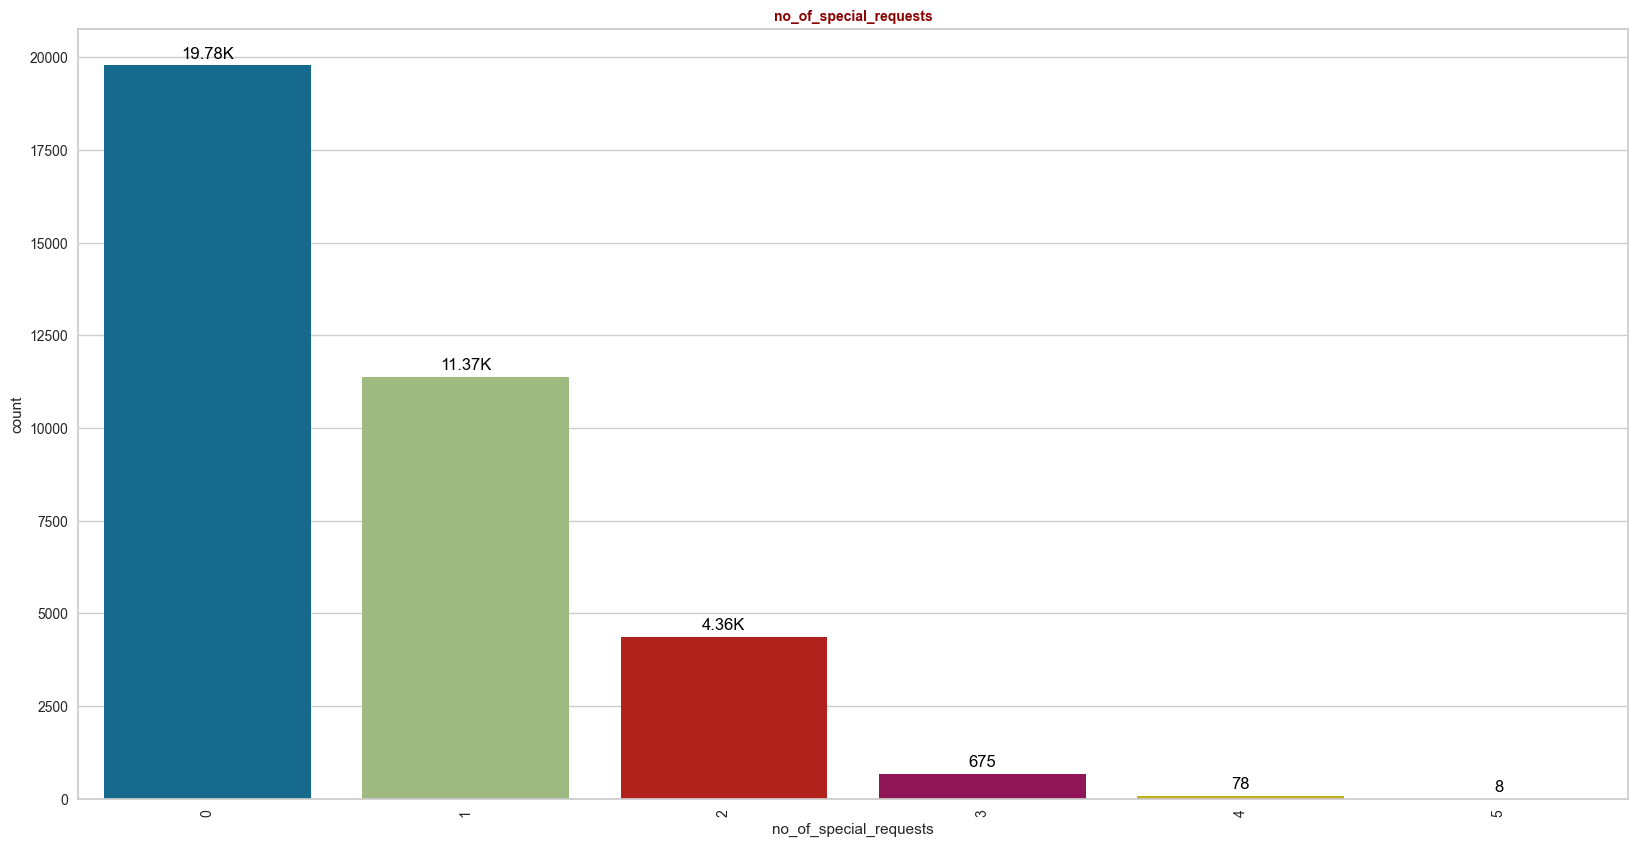

In [16]:


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "arrival_month", ax = ax,order=df['arrival_month'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("arrival_month", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()



fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "market_segment_type", ax = ax,order=df['market_segment_type'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("market_segment_type", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "repeated_guest", ax = ax,order=df['repeated_guest'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("repeated_guest", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "no_of_previous_cancellations", ax = ax,order=df['no_of_previous_cancellations'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("no_of_previous_cancellations", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()


fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "no_of_special_requests", ax = ax,order=df['no_of_special_requests'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("no_of_special_requests", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()

<Axes: xlabel='booking_status', ylabel='count'>

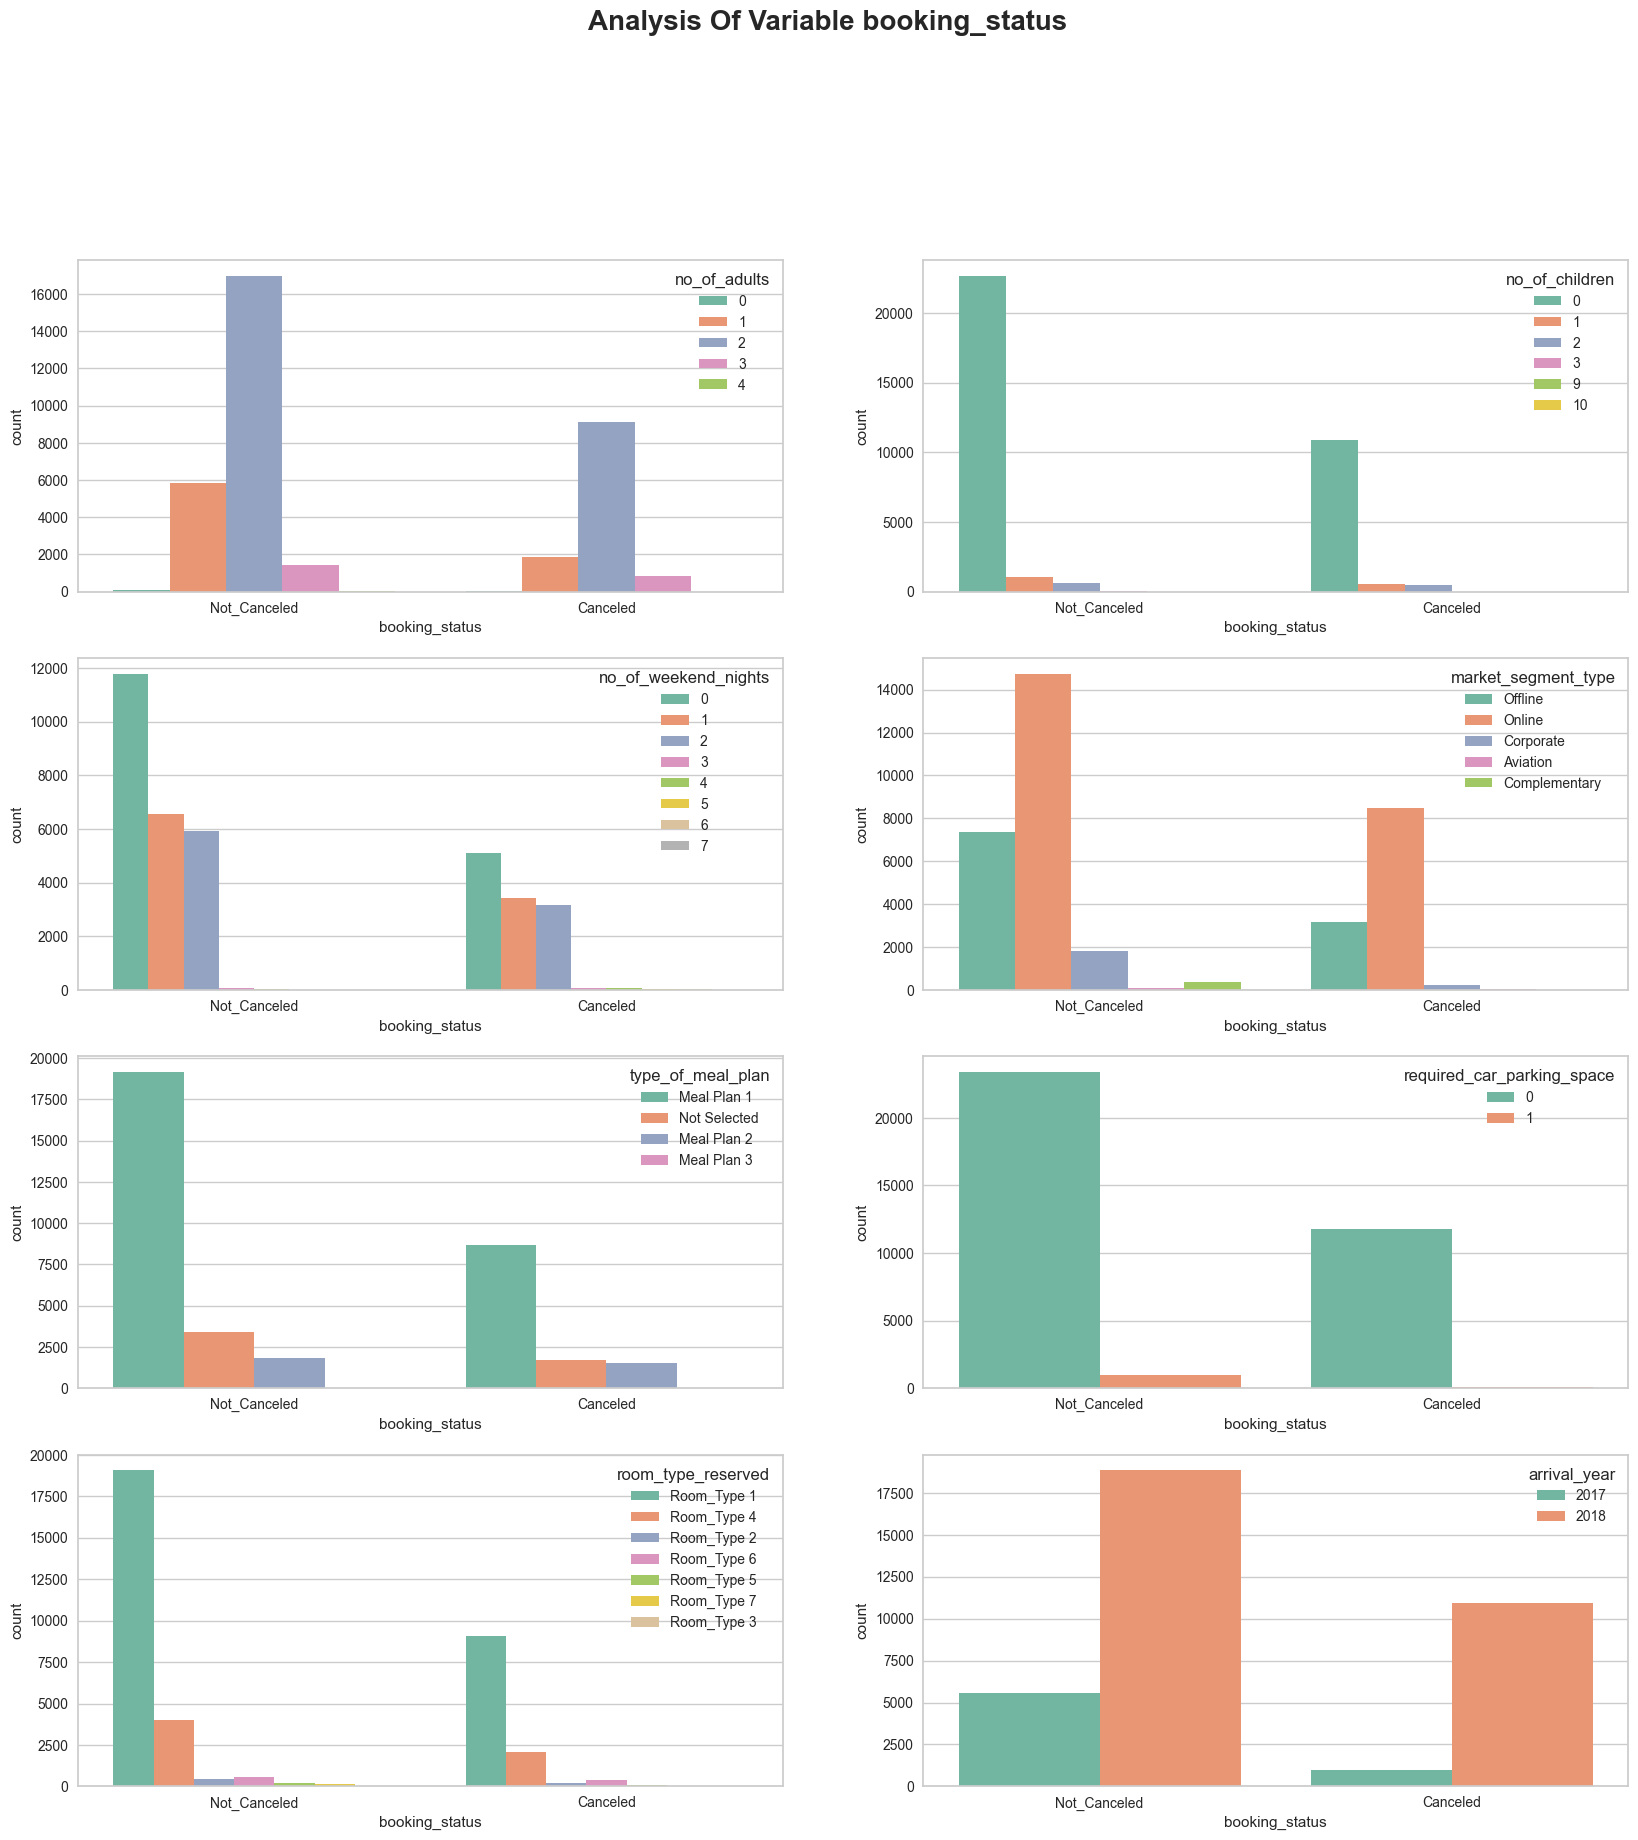

In [17]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

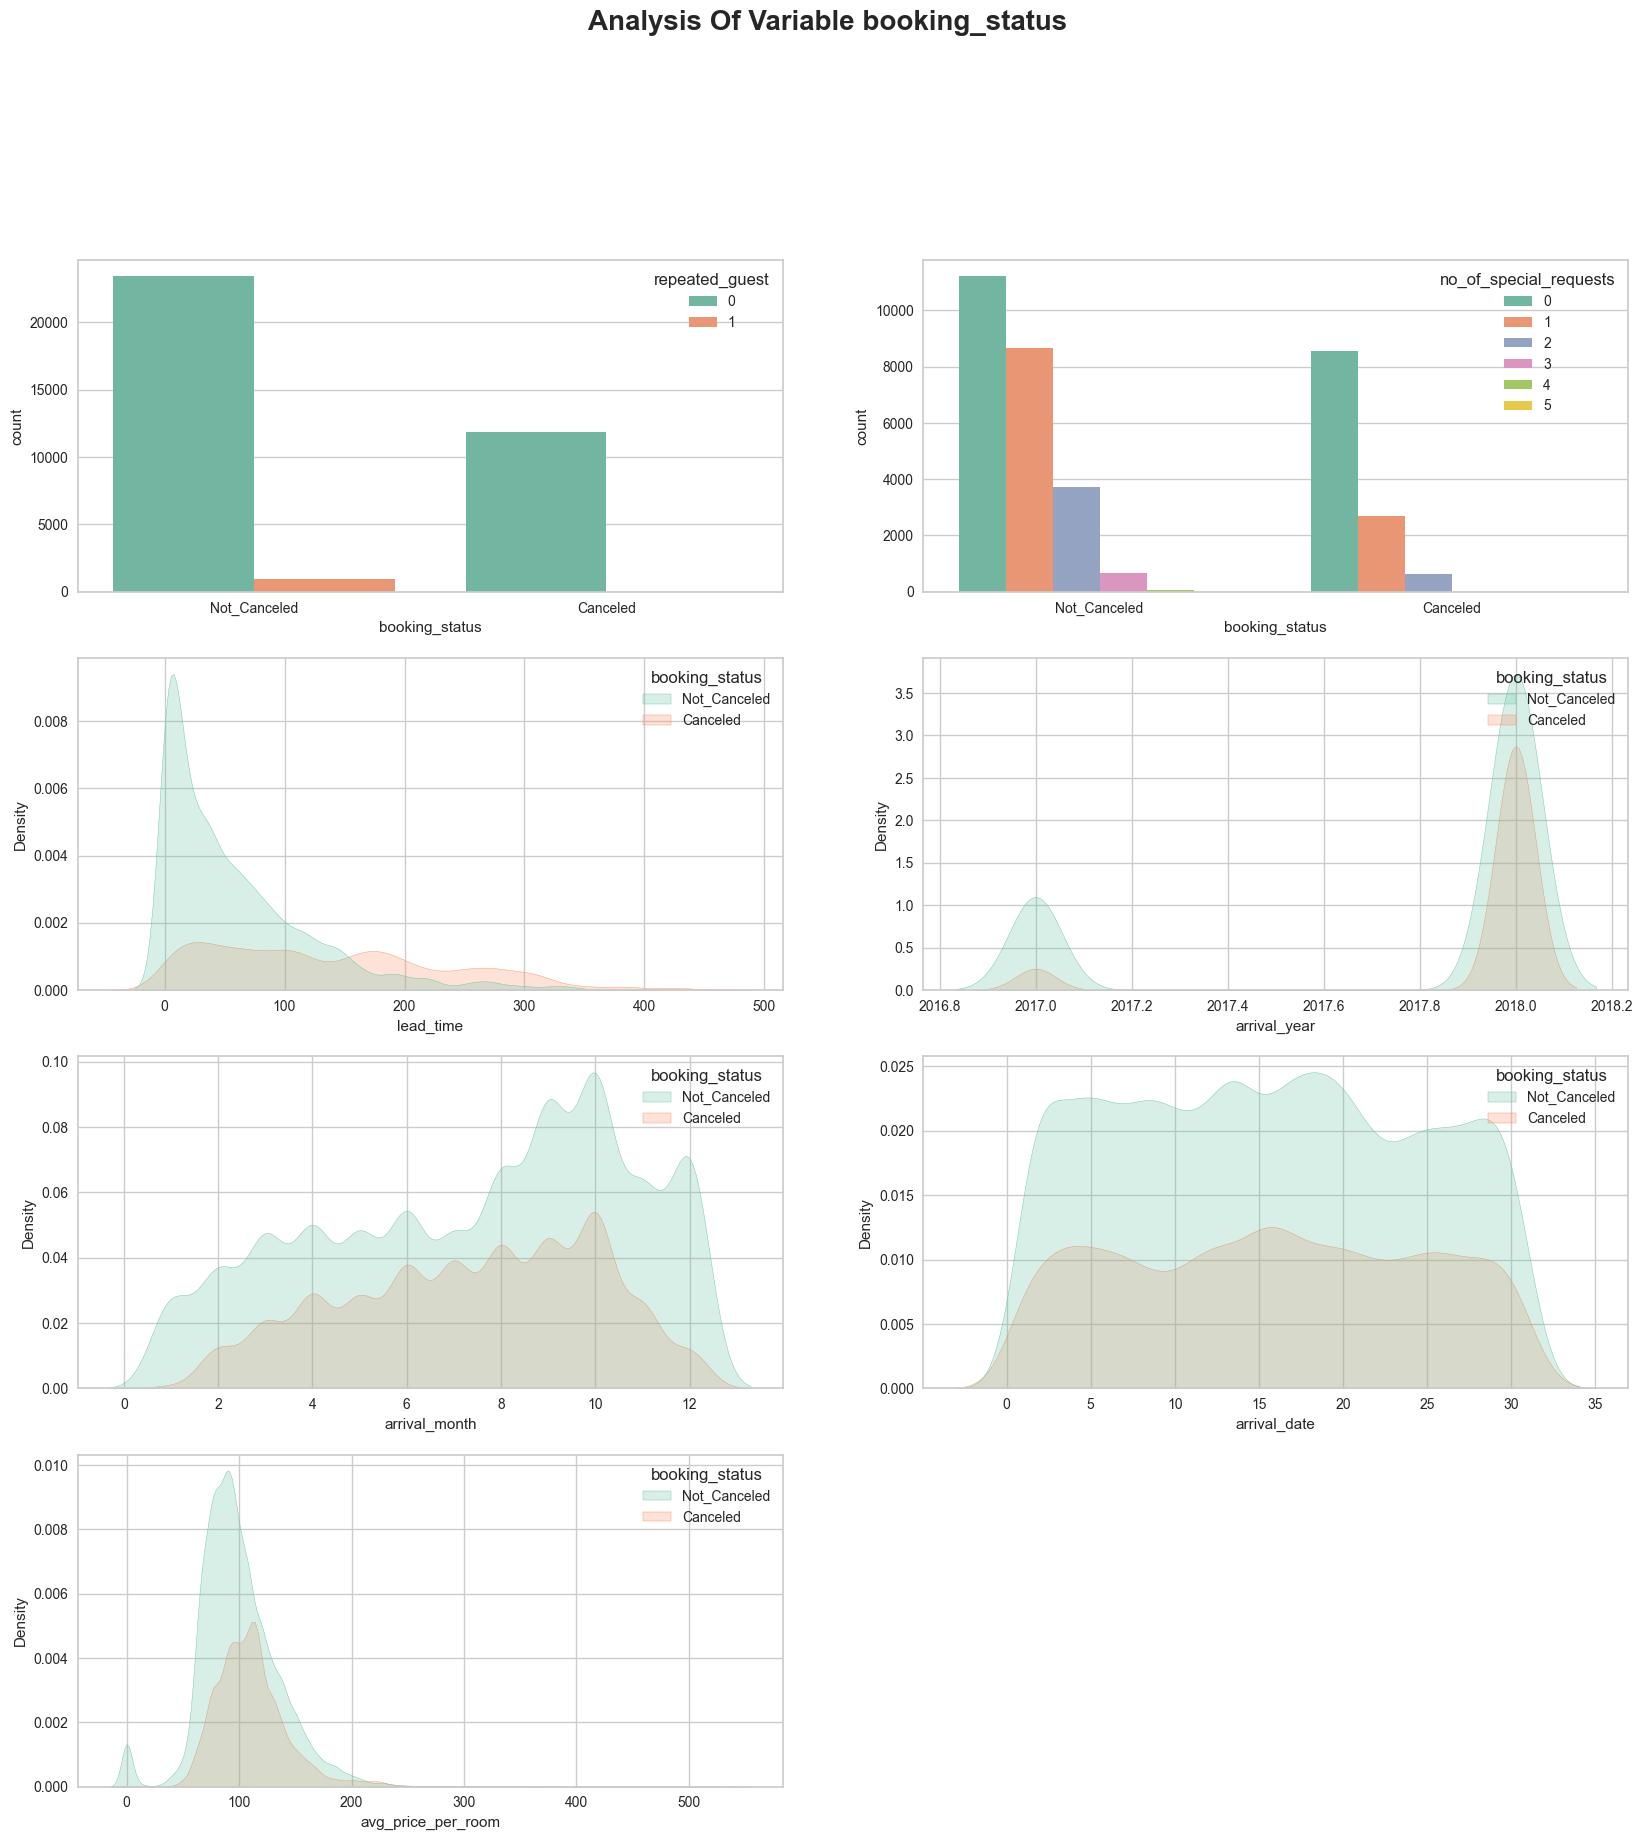

In [18]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

<Axes: xlabel='lead_time', ylabel='Density'>

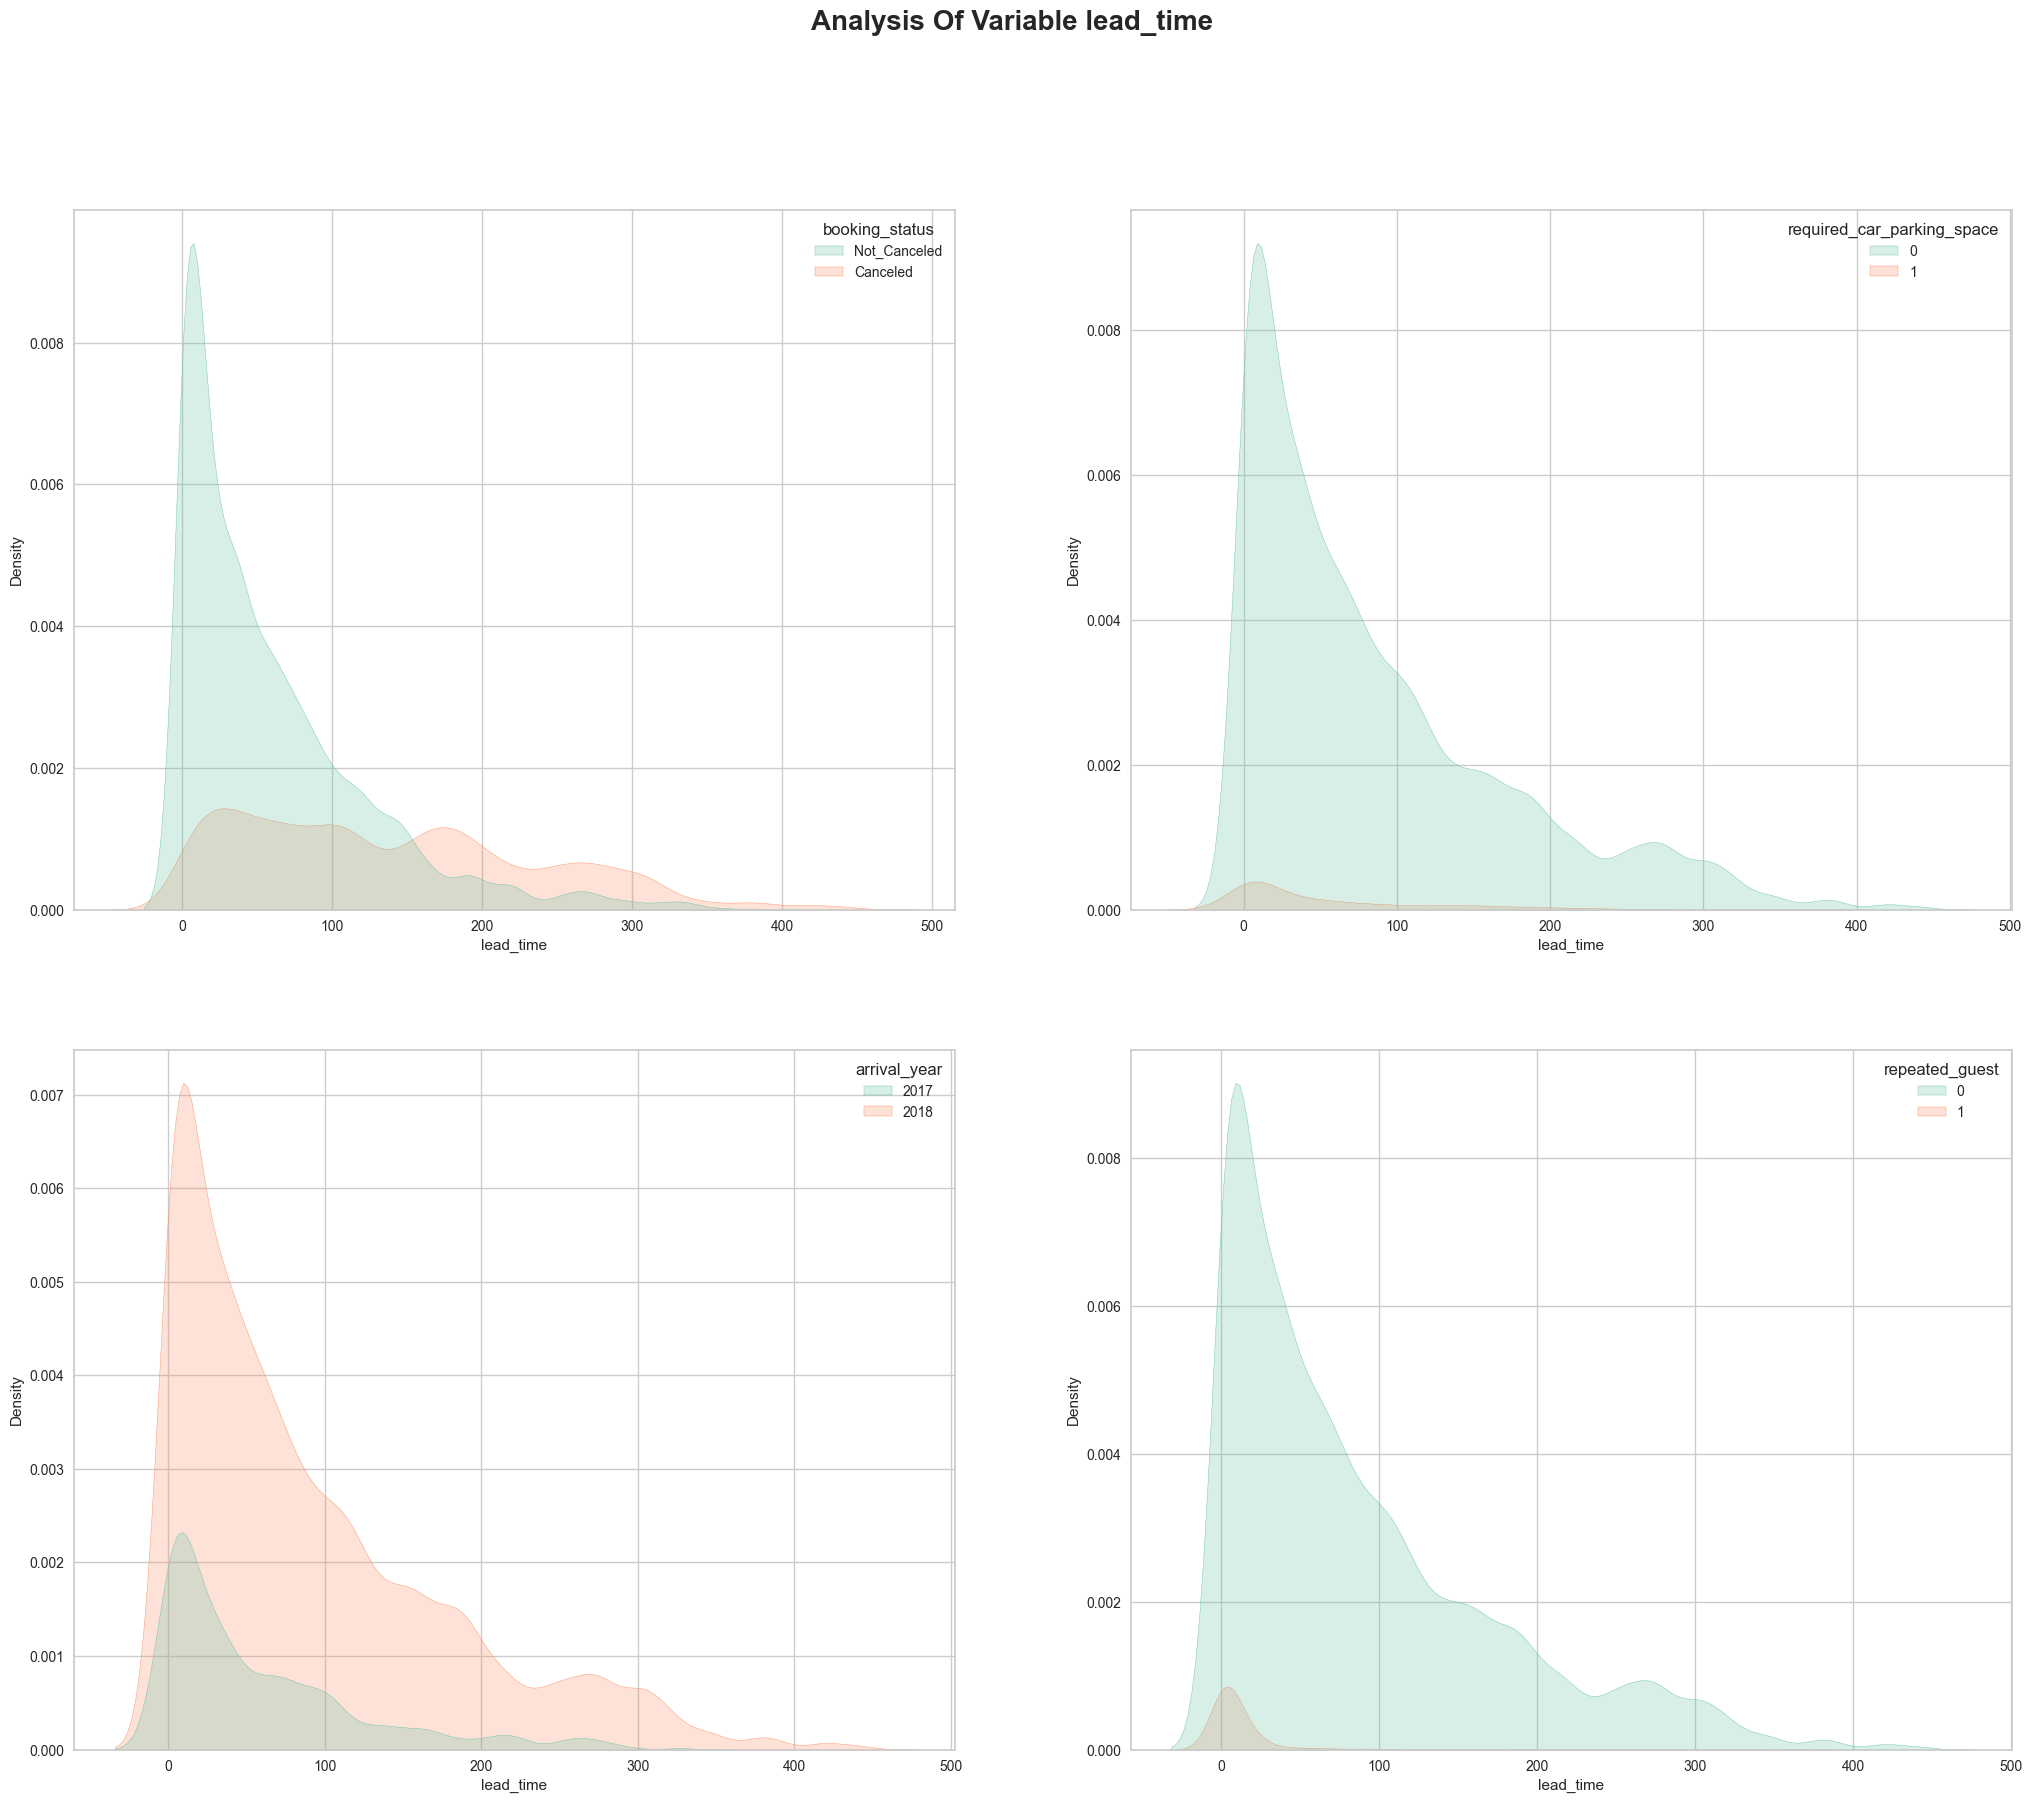

In [19]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

<Axes: xlabel='no_of_special_requests', ylabel='lead_time'>

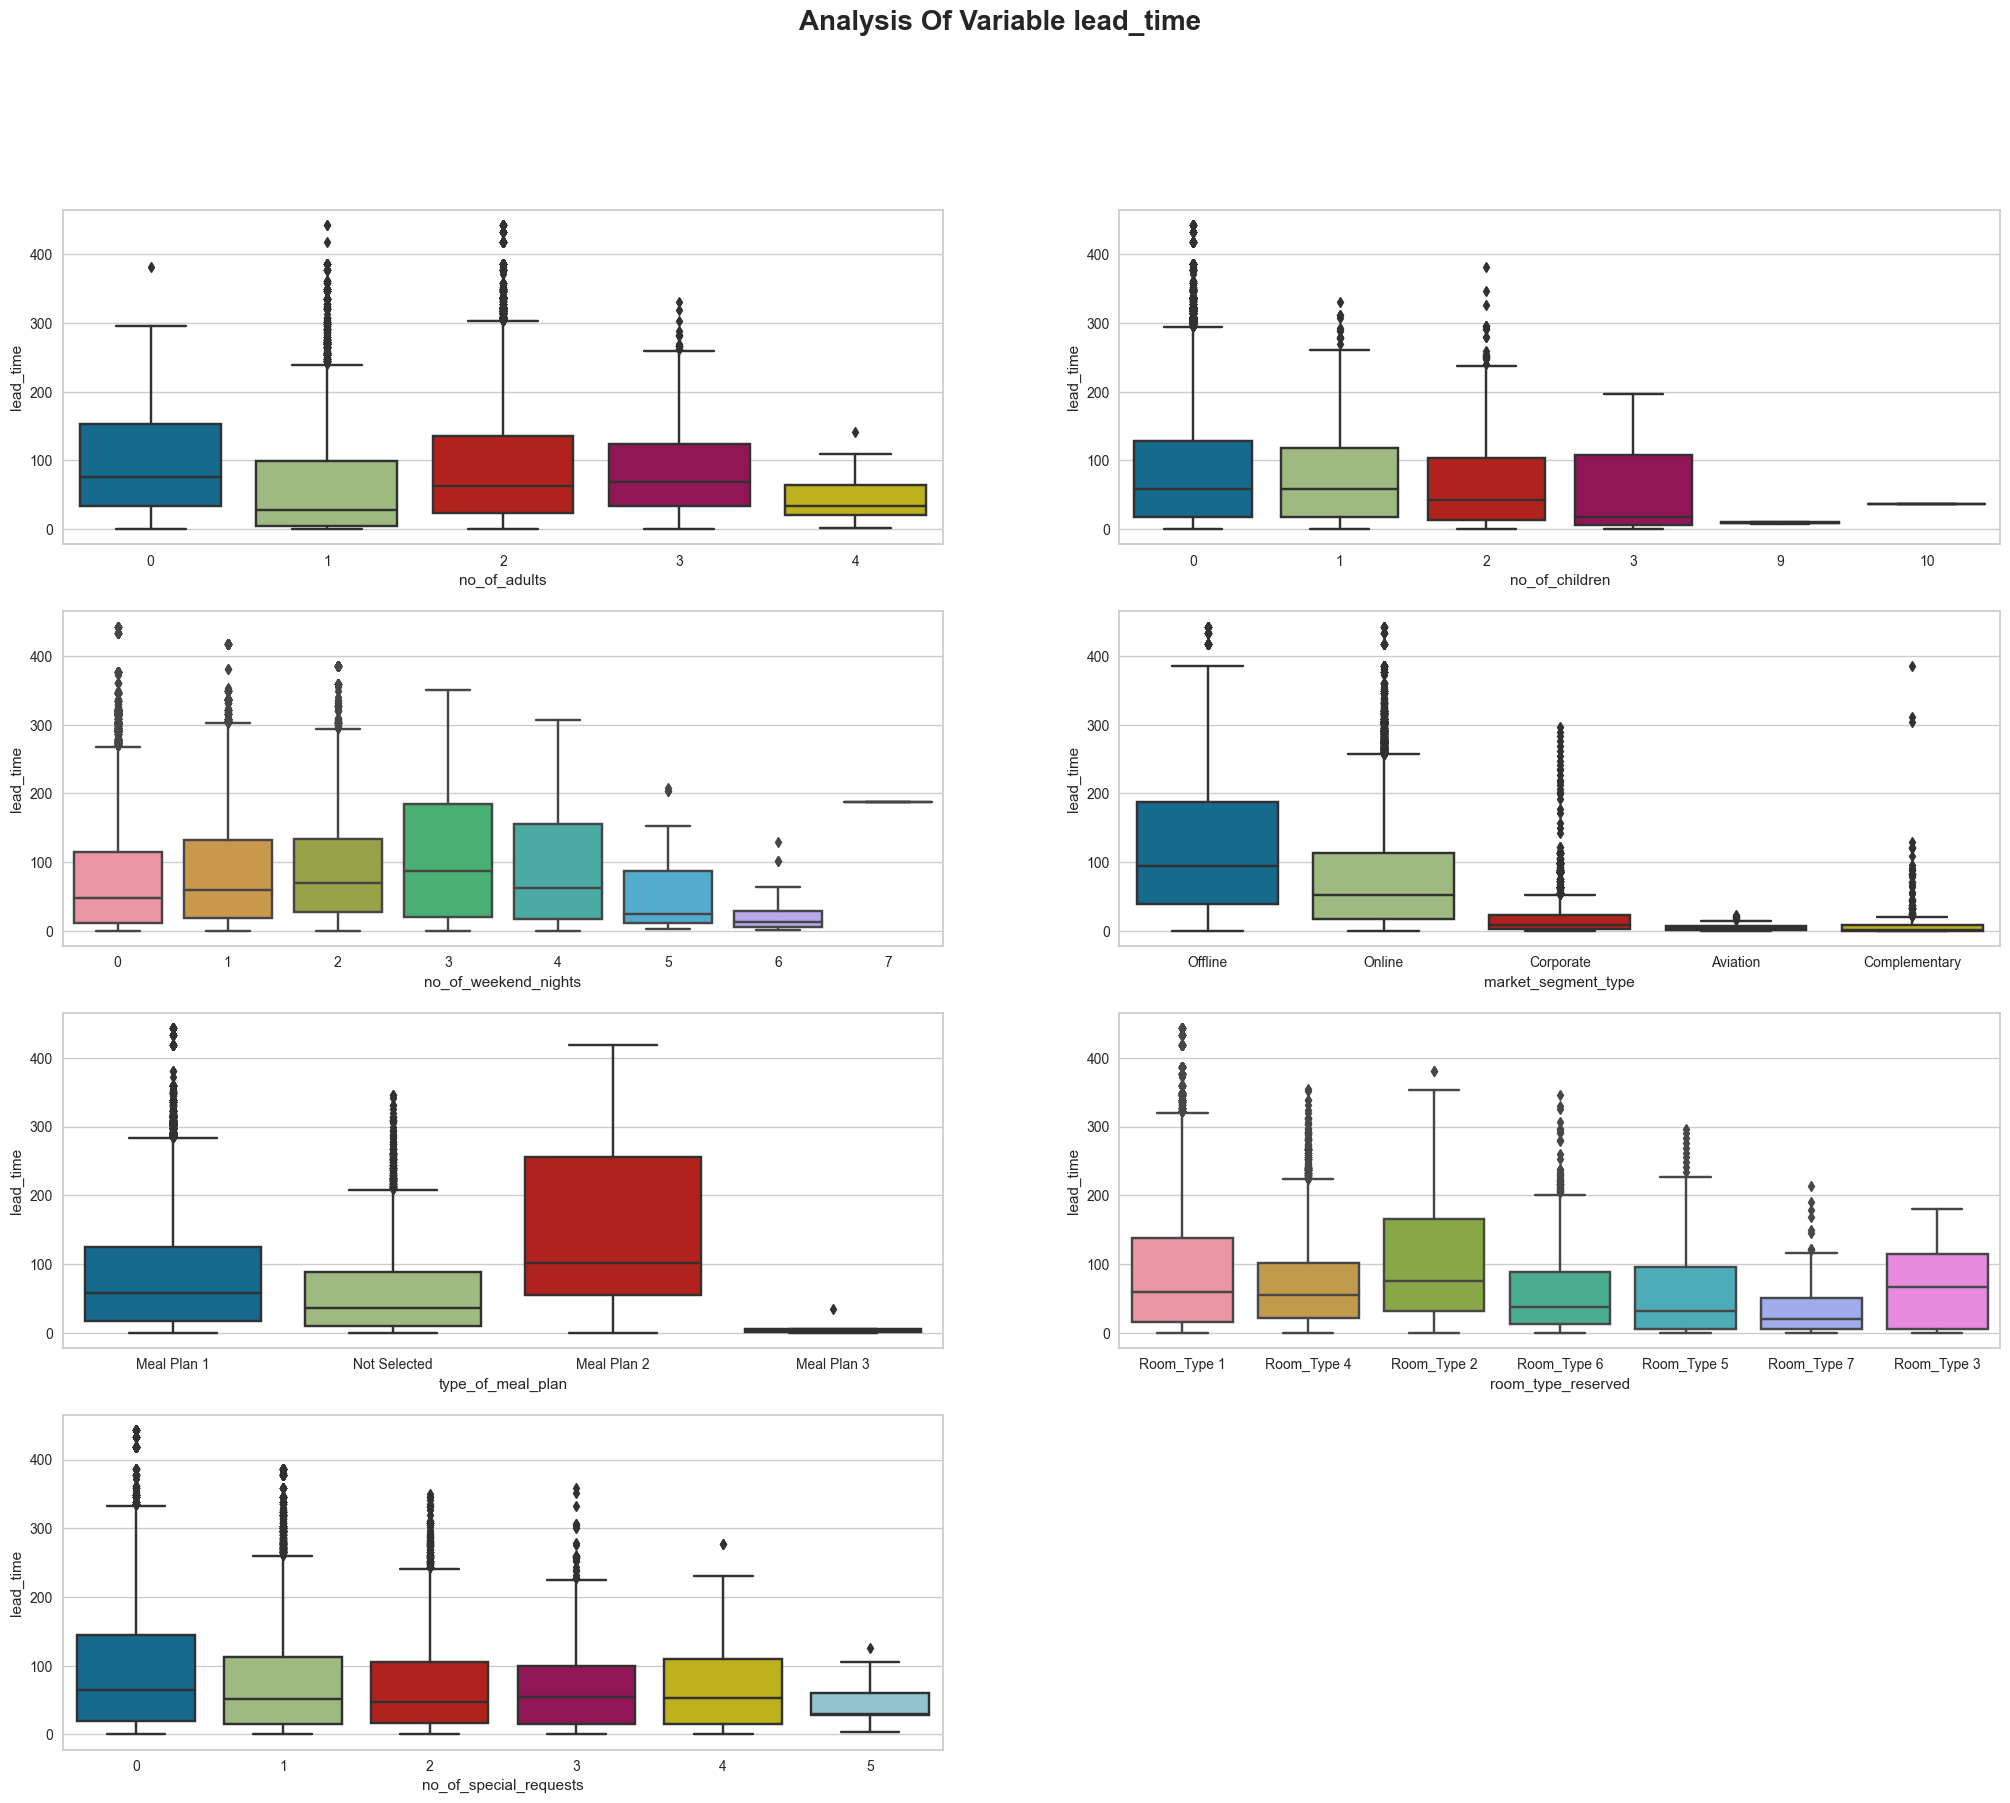

In [20]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

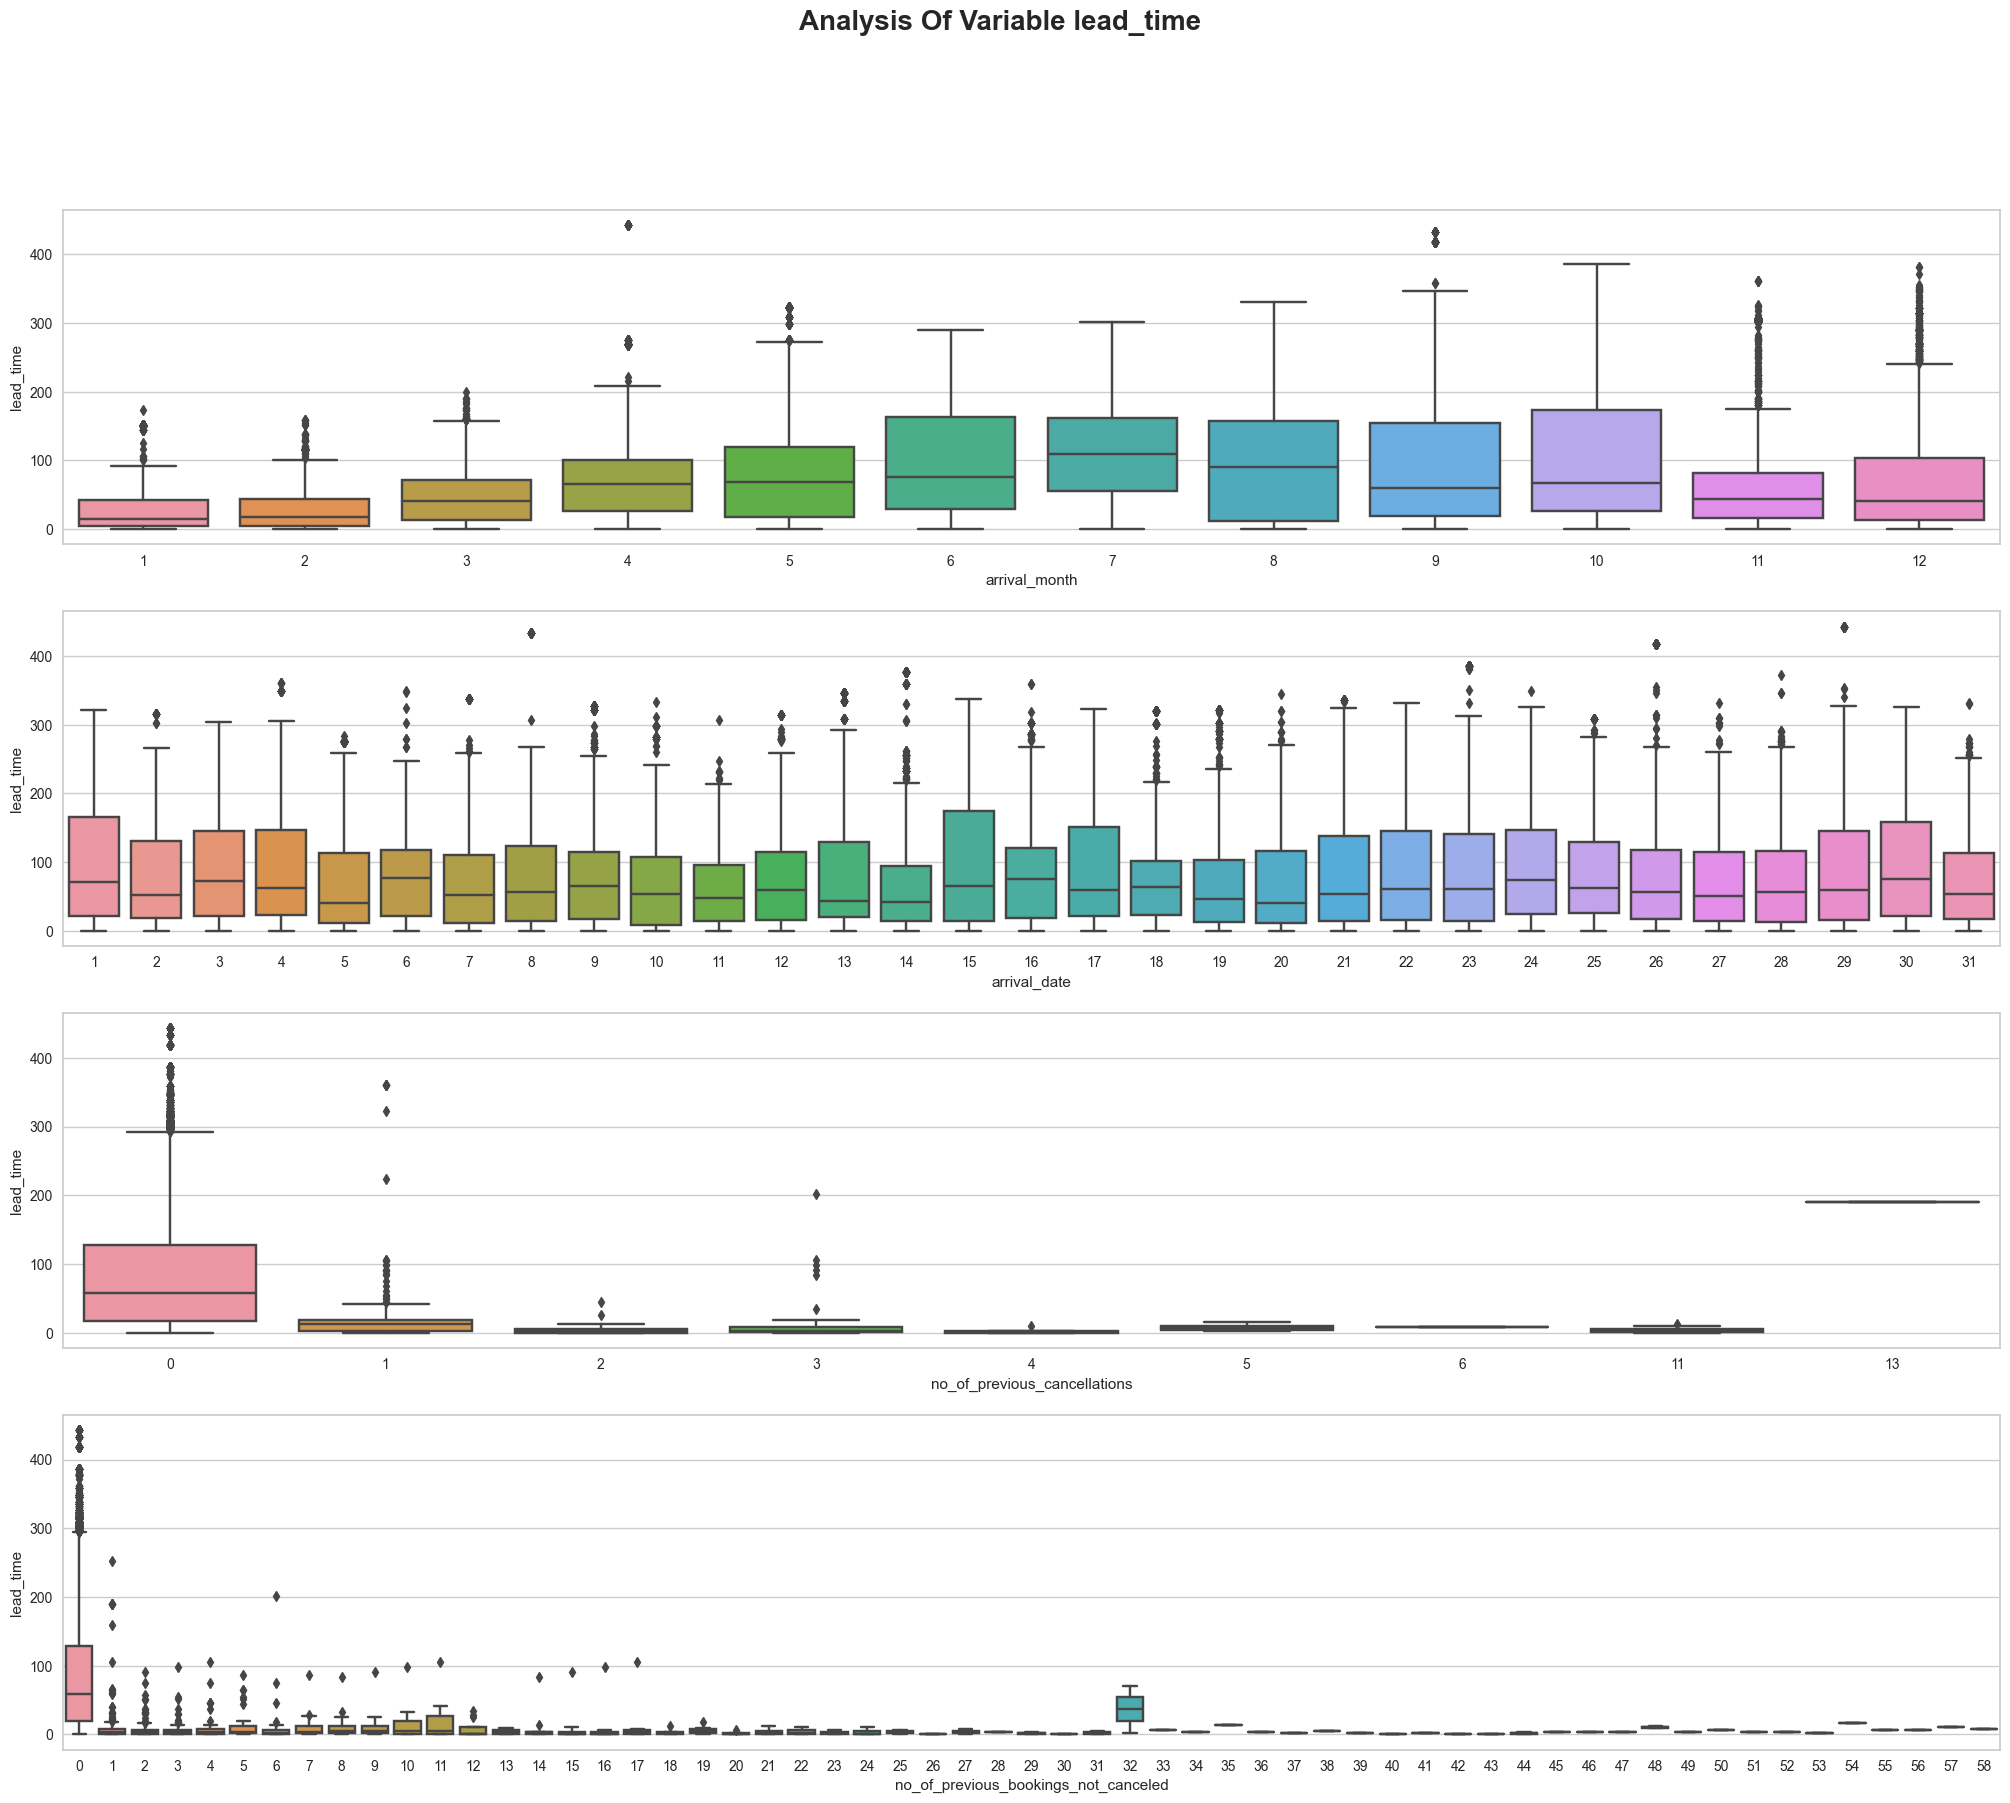

In [21]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

In [22]:
df = df.drop('Booking_ID', axis = 1)

In [23]:
df.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()


In [25]:

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [26]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


In [27]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

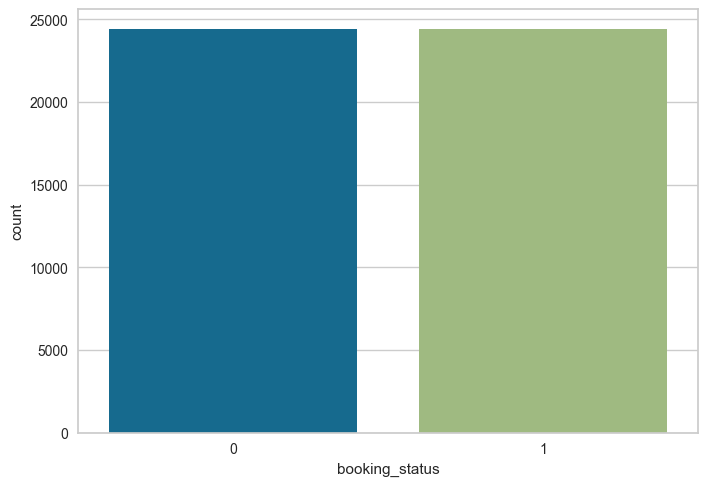

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [29]:
df.shape

(36275, 18)

In [30]:
X.shape

(48780, 17)

In [31]:
y

0        1
1        1
2        0
3        0
4        0
        ..
48775    0
48776    0
48777    0
48778    0
48779    0
Name: booking_status, Length: 48780, dtype: int32

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

0.5662839961732951

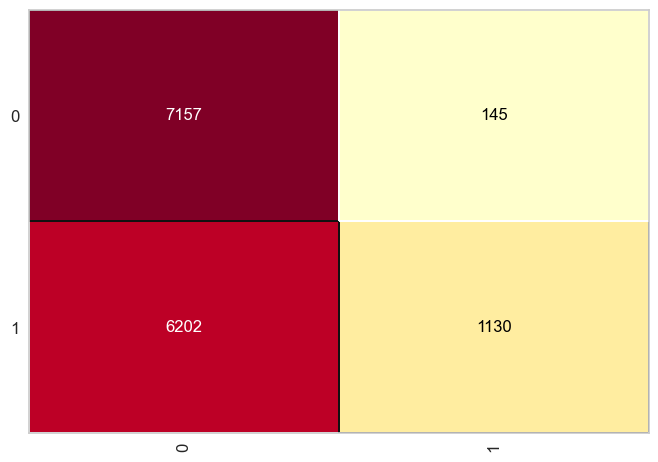

In [35]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [36]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [37]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.8668072278953314


In [38]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

0.8665436654366544

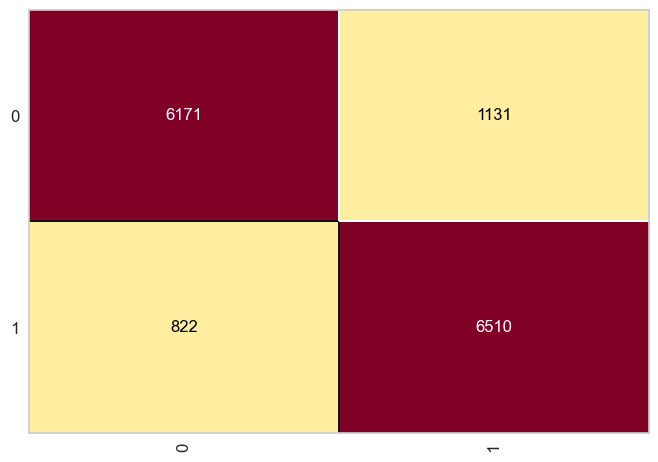

In [39]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

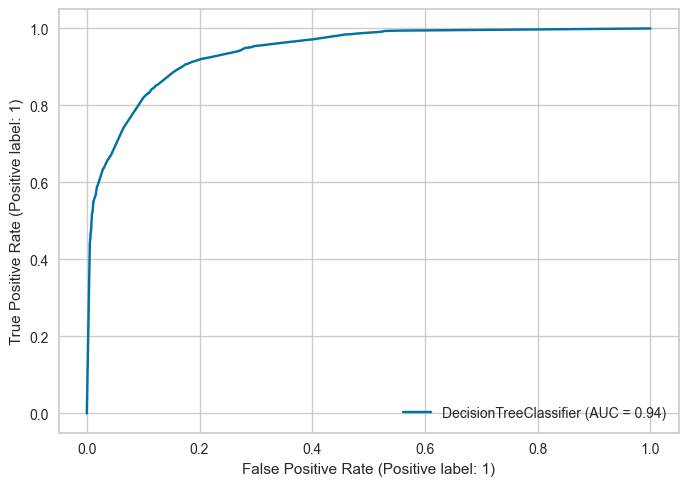

In [40]:
RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)

In [41]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7302
           1       0.85      0.89      0.87      7332

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



In [42]:
score_tree = 0.8007027511961723

In [43]:
columns = df.drop('booking_status', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.407987
market_segment_type                     0.151215
no_of_special_requests                  0.132067
avg_price_per_room                      0.102131
arrival_month                           0.061918
arrival_date                            0.030956
no_of_week_nights                       0.026384
no_of_weekend_nights                    0.025761
no_of_adults                            0.022820
arrival_year                            0.015264
required_car_parking_space              0.009477
type_of_meal_plan                       0.009072
room_type_reserved                      0.003504
no_of_children                          0.001242
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

In [45]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8714342738218951
Mín Split:  4
Max Nvl:  11


In [46]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

0.8713953806204728

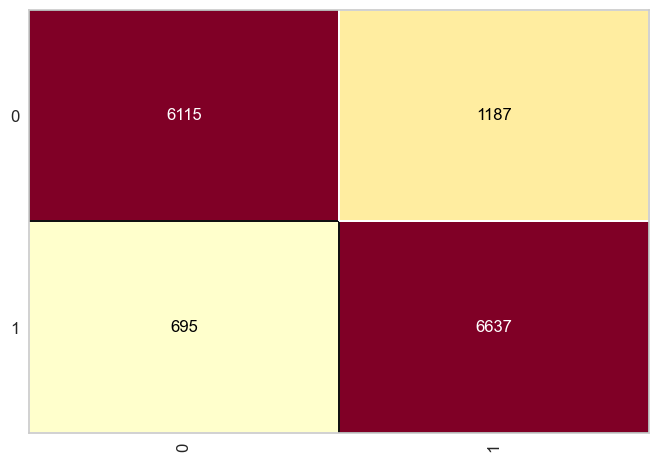

In [47]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [48]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7302
           1       0.85      0.91      0.88      7332

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



In [49]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [50]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [51]:
y_pred_prob = predict_prob_on_test_data(decision_tree,X_test) #model.predict_proba(X_test)

In [52]:
# experiment_name = "basic_classifier" ##basic classifier
# run_name="Desicion_Tree_Classifier"
# run_metrics = get_metrics(y_test, previsoes, y_pred_prob)
# print(run_metrics)

Function to create an experiment in MLFlow and log parameters, metrics and artifacts files like images etc.

In [53]:
# def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
#                       roc_auc_plot_path = None, run_params=None):
#     import mlflow
#     #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
#     mlflow.set_experiment(experiment_name)
    
#     with mlflow.start_run():
        
#         if not run_params == None:
#             for param in run_params:
#                 mlflow.log_param(param, run_params[param])
            
#         for metric in run_metrics:
#             mlflow.log_metric(metric, run_metrics[metric])
        
#         mlflow.sklearn.log_model(model, "model")
        
#         if not confusion_matrix_path == None:
#             mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
#         if not roc_auc_plot_path == None:
#             mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
#         mlflow.set_tag("tag1", "Decision Tree")
#         mlflow.set_tags({"tag2":"RandomForestClassifier", "tag3":"Production"})
            
#     print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [54]:
# create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png', 'roc_auc_curve.png')

Create another experiment after tuning hyperparameters and log the best set of parameters for which model gives the optimal performance

In [55]:
# def predict_on_test_data(model,X_test):
#     y_pred = model.predict(X_test)
#     return y_pred

In [56]:
# def hyper_parameter_tuning(X_train, y_train):
#     # define random parameters grid
#     n_estimators = [5,21,51,101] # number of trees in the random forest
#     max_features = ['auto', 'sqrt'] # number of features in consideration at every split
#     max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
#     min_samples_split = [2, 6, 10] # minimum sample number to split a node
#     min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
#     bootstrap = [True, False] # method used to sample data points

#     random_grid = {'n_estimators': n_estimators,
#                     'max_features': max_features,
#                     'max_depth': max_depth,
#                     'min_samples_split': min_samples_split,
#                     'min_samples_leaf': min_samples_leaf,
#                     'bootstrap': bootstrap
#                   }
    
#     from sklearn.model_selection import RandomizedSearchCV
#     from sklearn.ensemble import RandomForestClassifier
#     classifier = RandomForestClassifier()
#     model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
#                    n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
#     model_tuning.fit(X_train, y_train)

#     print ('Random grid: ', random_grid, '\n')
#     # print the best parameters
#     print ('Best Parameters: ', model_tuning.best_params_, ' \n')

#     best_params = model_tuning.best_params_
    
#     n_estimators = best_params['n_estimators']
#     min_samples_split = best_params['min_samples_split']
#     min_samples_leaf = best_params['min_samples_leaf']
#     max_features = best_params['max_features']
#     max_depth = best_params['max_depth']
#     bootstrap = best_params['bootstrap']
    
#     model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
#                                          min_samples_leaf= min_samples_leaf, max_features = max_features,
#                                          max_depth= max_depth, bootstrap=bootstrap) 
#     model_tuned.fit( X_train, y_train)
#     return model_tuned,best_params

In [57]:
# import mlflow
# experiment_name = "optimized model"
# run_name="Random_Search_CV_Tuned_Model"
# model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
# run_params = best_params

# y_pred = predict_on_test_data(model_tuned,X_test) #will return the predicted class
# y_pred_prob = predict_prob_on_test_data(model_tuned,X_test) #model.predict_proba(X_test)
# run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [58]:
#run_params

In [59]:
# create_experiment(experiment_name,run_name,run_metrics,model_tuned,'confusion_matrix.png', 'roc_auc_curve.png',run_params)


1 - Add more details for all algorithms and why did we choose this algo

2 - High accuracy have obtained is not due to overfitting. Put model on validation test, or if it is simply a result of the model having memorized the patterns in the training set.

3 - Ensembling methods (for better result)

4 - You should consider interpreting your model to understand how it is making predictions. This can be done using techniques such as eli5, shap, perf_plot, pdpbox, lime, or LRP. Understanding the decision-making process of your model can help you improve its performance and trustworthiness. (for black box thing).

5 - Using early stopping with keras

6 - Using learning rate scheduler with keras

7 - try other architectures (like deep learing techniques)

8 - Hyperparameter tuning with keras tuner

9 - Target encoding for categorical values (Target Leakage [maybe])

10- Balanced Batches (Some trick that usually helps is to use balanced batches)
